# Исследование объявлений о продаже квартир 

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Импортируем библиотеки, с которыми будем работать

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Сохраняем данные в переменную df

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv')
display(df.head(10))

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Данные представлены в виде склеенной строки, поэтому применим в качестве разделителя столбцов знак табуляции и выведем на экран первые 10 строк таблицы. <a id='intro'></a>

In [3]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Посмотрим общую информацию о данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Посмотрим описательную статистику по каждому столбцу датафрейма

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

В таблице "Архив объявлений о продаже квартир" 23699 строк и 22 столбца. В двух столбцах тип данных - bool, в 14 столбцах - float64, по три столбца типа int64 и object.
В столбце "Число комнат" обнаружены значения, равные нулю, что противоречит логике, т.к. количество комнат в квартире не может быть меньше единицы. Предположим, что такие ошибки обусловлены человеческим фактором. Всего таких "неправильных" квартир меньше 1%, поэтому данные не могут серьезно повлиять на результаты исследований, следовательно можем оставить их без изменений.
Количество значений в столбцах различается. Значит, в данных есть пропущенные значения. 

## Предобработка данных

### Стиль заголовков

Посмотрим названия столбцов нашей таблицы

In [6]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Столбцы "Количество комнат" и "Расстояние до центра города" переименуем в соответствии со змеиным стилем.

In [7]:
df = df.rename(columns={'rooms': 'number_of_rooms', 'cityCenters_nearest': 'city_centers_nearest'})

In [8]:
# проверка переименованных столбцов
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'number_of_rooms', 'ceiling_height', 'floors_total', 'living_area',
       'floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area',
       'balcony', 'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Привели названия столбцов в  соответствие с хорошим стилем.

### Пропуски значений

Убедимся, что данные по общей площади квартиры  не превышают сумму жилой площади и площади кухни до того как обработаем пропуски.

In [9]:
df_filtr_before = df.query('total_area < (living_area+kitchen_area)')
df_filtr_before

,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,...,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,NaN,18.0,20.00,9,NaN,...,5.00,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,NaN,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,NaN,...,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,NaN,...,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21824,20,2450000.0,44.00,2019-02-12T00:00:00,2,27.00,2.0,38.00,2,False,...,8.60,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21868,12,2600000.0,34.30,2018-09-26T00:00:00,1,2.50,9.0,30.60,6,NaN,...,8.00,2.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,107.0
21915,14,11990000.0,91.40,2016-05-16T00:00:00,2,NaN,16.0,62.00,12,NaN,...,32.40,0.0,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,93.0
21956,0,5200000.0,46.00,2018-07-20T00:00:00,2,NaN,5.0,44.00,5,NaN,...,8.00,1.0,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0.0,NaN,7.0


Всего в исходных данных 64 объявления, в которых общая площадь квартиры больше, чем сумма жилой площади и площади кухни. Вероятно такие ошибочные данные появились из-за неточности в расчетах или возникли при публикации объявления как опечатки в заполнении нужных параметров пользователями.

Посчитаем количество пропущенных значений в каждом из столбцов датафрейма.

In [10]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
number_of_rooms             0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Мы обнаружили в объявлениях много пропущенных значений. Заполним пропуски на медиану по каждому населенному пункту в столбцах:  
* "Высота потолков",
* "Растояние до центра города",
* "Сколько дней было размещено объявление".  

В столбцах "Жилая площадь" и "Площадь кухни" заполним пропуски на медиану по каждому населенному пункту и по общей площади квартиры.

In [11]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('locality_name')['ceiling_height'].transform('median'))
df['living_area'] = df['living_area'].fillna(df.groupby(['locality_name','total_area'])['living_area'].transform('median'))
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby(['locality_name','total_area'])['kitchen_area'].transform('median')) 
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(df.groupby('locality_name')['city_centers_nearest'].transform('median'))
df['days_exposition'] = df['days_exposition'].fillna(df.groupby('locality_name')['days_exposition'].transform('median'))

# проверка замены пропущенных значений
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
number_of_rooms             0
ceiling_height            156
floors_total               86
living_area               560
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area              701
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5394
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition            81
dtype: int64

Убедимся, что данные по общей площади квартиры  не превышают сумму жилой площади и площади кухни после замены пропущенных значений.

In [12]:
df_filtr_after = df.query('total_area < (living_area+kitchen_area)')
df_filtr_after

,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,...,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
424,14,11500000.0,98.00,2016-05-10T00:00:00,3,2.65,3.0,88.00,3,False,...,13.60,1.0,Санкт-Петербург,39363.0,13270.0,0.0,NaN,0.0,NaN,90.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,2.70,18.0,20.00,9,NaN,...,5.00,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,NaN,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,NaN,...,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21915,14,11990000.0,91.40,2016-05-16T00:00:00,2,2.70,16.0,62.00,12,NaN,...,32.40,0.0,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,93.0
21956,0,5200000.0,46.00,2018-07-20T00:00:00,2,2.70,5.0,44.00,5,NaN,...,8.00,1.0,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0.0,NaN,7.0
22095,6,2194000.0,36.50,2017-09-27T00:00:00,1,2.70,3.0,33.20,3,NaN,...,8.85,0.0,Санкт-Петербург,39446.0,18500.0,0.0,NaN,2.0,639.0,36.0
22246,6,3100000.0,27.30,2018-05-29T00:00:00,0,2.70,16.0,23.30,15,NaN,...,7.50,1.0,Санкт-Петербург,41935.0,9551.0,0.0,NaN,0.0,NaN,59.0


После замены пропущенных значений увеличилось до 104 количество объявлений, в которых общая площадь квартиры превышает сумму жилой площади и кухни. Поскольку в исходных данных такие ошибки встречались и у нас нет инструментов, чтобы достоверно исправить данные, оставим такие неточности без изменений (тем более существенно на ход исследования они не повляют). 

Пропущенные значения в столбцах:
* "Площадь кухни", 
* "Жилая площадь", 
* "Всего этажей в доме",
* "Количество дней размещения объявления",
* "Высота потолков" рассчитать не можем, поэтому удалим строки с пропущенными значениями в этих столбцах. 

Пропуски в столбце "Название населенного пункта" тоже удаляем, такие объявления неинформативны для покупателей квартиры и для нашего исследования тоже.

In [13]:
df = df.dropna(subset=['kitchen_area',
                       'living_area', 
                       'floors_total', 
                       'days_exposition', 
                       'ceiling_height', 
                       'locality_name'])

# проверка удаления пропущенных значений
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
number_of_rooms             0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            19905
studio                      0
open_plan                   0
kitchen_area                0
balcony                 10862
locality_name               0
airports_nearest         4818
city_centers_nearest     4683
parks_around3000         4794
parks_nearest           14655
ponds_around3000         4794
ponds_nearest           13702
days_exposition             0
dtype: int64

Удалим столбцы, не участвующие в исследовании:
* "Расстояние до аэропорта",
* "Количество балконов", 
* "Апартаменты",
* "Свободная планировка", 
* "Число парков в радиусе 3 км", 
* "Расстояние до ближайшего парка", 
* "Число водоёмов в радиусе 3 км",
* "Расстояние до ближайшего водоёма", 
* "Квартира-студия", 
* "Число фотографий квартиры в объявлении".

Тем более, что они содержат значительно много пропущенных значений. У нас нет никаких оснований полагать, что мы их достоверно можем восстановить на основе имеющихся данных

In [14]:
df = df.drop(['airports_nearest', 'balcony','is_apartment', 'open_plan', 'parks_around3000',
              'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'studio', 'total_images'], 1)
df.head()

,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition
0,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,25.0,Санкт-Петербург,16028.0,95.0
1,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11.0,18.6,1,11.0,посёлок Шушары,18603.0,81.0
2,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5.0,34.3,4,8.3,Санкт-Петербург,13933.0,558.0
3,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14.0,99.0,9,15.0,Санкт-Петербург,6800.0,424.0
4,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,41.0,Санкт-Петербург,8098.0,121.0


### Тип данных

Заменим вещественный тип данных в столбцах "Сколько дней было размещено объявление", "Всего этажей в доме" на целочисленный тип данных

In [15]:
df['days_exposition'] = df['days_exposition'].astype('int16')
df['floors_total'] = df['floors_total'].astype('int16')
df['number_of_rooms'] = df['number_of_rooms'].astype('int16')
df['floor'] = df['floor'].astype('int16')
df['locality_name'] = df['locality_name'].astype('category')
# проверка замены
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22573 entries, 0 to 23698
Data columns (total 12 columns):
last_price              22573 non-null float64
total_area              22573 non-null float64
first_day_exposition    22573 non-null object
number_of_rooms         22573 non-null int16
ceiling_height          22573 non-null float64
floors_total            22573 non-null int16
living_area             22573 non-null float64
floor                   22573 non-null int16
kitchen_area            22573 non-null float64
locality_name           22573 non-null category
city_centers_nearest    17890 non-null float64
days_exposition         22573 non-null int16
dtypes: category(1), float64(6), int16(4), object(1)
memory usage: 1.6+ MB


Количество дней размещения объявления и количество этажей не может быть дробным, поэтому мы заменили тип данных с вещественного на целочисленнй.

### Дубликаты

In [16]:
# проверка на дубликаты
df.duplicated().sum()

0

Явных дубликатов нет, проверим неявные дубликаты в столбце "Название населенного пункта"

In [17]:
# поиск уникальных значений в столбце "Название населенного пункта"
df['locality_name'].sort_values().unique()

[Бокситогорск, Волосово, Волхов, Всеволожск, Выборг, ..., садовое товарищество Рахья, село Копорье, село Павлово, село Путилово, село Русско-Высоцкое]
Length: 258
Categories (258, object): [Бокситогорск, Волосово, Волхов, Всеволожск, ..., село Копорье, село Павлово, село Путилово, село Русско-Высоцкое]

In [18]:
df['locality_name'].value_counts()

Санкт-Петербург                  15464
посёлок Мурино                     443
посёлок Шушары                     422
Всеволожск                         374
Пушкин                             354
                                 ...  
поселок Возрождение                  1
посёлок Ленинское                    1
посёлок Лисий Нос                    1
поселок Гладкое                      1
поселок Пансионат Зелёный Бор        1
Name: locality_name, Length: 258, dtype: int64

Название одного и того же населенного пункта может быть записано по-разному из-за букв "е" и "ё" в словах "поселок" и "посёлок".  
Заменим "ё" на "е".

In [19]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [20]:
df['locality_name'].value_counts()

Санкт-Петербург                        15464
поселок Мурино                           472
поселок Шушары                           422
Всеволожск                               374
Пушкин                                   354
                                       ...  
поселок Гончарово                          1
поселок городского типа Кондратьево        1
деревня Суоранда                           1
поселок Совхозный                          1
поселок Серебрянский                       1
Name: locality_name, Length: 236, dtype: int64

Было 258 названий, стало 236. Неявных дубликатов стало меньше.

Уберём теперь типы населённых пунктов, оставим одни названия. Потому что "городской поселок Мга" и "поселок городского типа Мга" - это один населённый пункт, только из-за некорректного написания дублируется. Для этого создадим функцию, которая удалит слова, написанные строчными буквами в столбце "Название населённого пункта".

In [21]:
# импортируем специальный модуль re
import re 

# функция only_upper вернет копию строки, с заменой слов, написанных строчными буквами и удалит пробелы в начале и конце строки
def only_upper(row):
    return re.sub(r'\b[а-я]+\s*', "", row['locality_name']).strip()
df['locality_name'] = df.apply(only_upper, axis=1)

# проверяем работу функции
df['locality_name'].value_counts()

Санкт-Петербург    15464
Мурино               472
Шушары               422
Кудрово              405
Всеволожск           374
                   ...  
Совхозный              1
Платформа 69-          1
Рапполово              1
Гладкое                1
Коробицыно             1
Name: locality_name, Length: 223, dtype: int64

Было 236 названий, стало 223, мы избавились от неявных дубликатов.

### Вывод

В ходе предобработки данных мы обнаружили несколько проблем:

- нарушения в стиле заголовков,
- пропущенные значения,
- некорректный тип данных,
- неявные дубликаты.

Мы исправили заголовки, чтобы упростить работу с таблицей, заменили тип данных. Без дубликатов исследование станет более точным.

Пропущенные значения мы заменили на медиану в тех столбцах, где это было возможно рассчитать. Предположительно большое количество пропусков связано с техническими ошибками - все геоданных были получены автоматически на основе картографических данных. Часть пропущенных значений о планировке и расположении квартир вероятно вызвана человеческим фактором при размещении объявлений - пользователи или невнимательно заполняют данные или умышленно не указывают некоторые характеристики квартир.

Приступим к исследованию.

## Расчёты и добавление результатов в таблицу

Рассчитаем цену квадратного метра и добавим в таблицу новый столбец "Цена квадратного метра".

In [22]:
df['price_sq_meter'] = df['last_price']/df['total_area']

df.head()

,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition,price_sq_meter
0,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,25.0,Санкт-Петербург,16028.0,95,120370.370370
1,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11,18.6,1,11.0,Шушары,18603.0,81,82920.792079
2,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5,34.3,4,8.3,Санкт-Петербург,13933.0,558,92785.714286
3,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14,99.0,9,15.0,Санкт-Петербург,6800.0,424,408176.100629
4,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,41.0,Санкт-Петербург,8098.0,121,100000.000000


Переведём значения в столбце "Дата публикации" к формату даты и времени. Добавим столбцы:
* "День недели публикации объявления", 
* "Месяц публикации объявления", 
* "Год публикации объявления"

In [23]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

df['day_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

#проверка
df.head()

,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition,price_sq_meter,day_exposition,month_exposition,year_exposition
0,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,Санкт-Петербург,16028.0,95,120370.370370,3,3,2019
1,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,11.0,Шушары,18603.0,81,82920.792079,1,12,2018
2,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,8.3,Санкт-Петербург,13933.0,558,92785.714286,3,8,2015
3,64900000.0,159.0,2015-07-24,3,2.70,14,99.0,9,15.0,Санкт-Петербург,6800.0,424,408176.100629,4,7,2015
4,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,Санкт-Петербург,8098.0,121,100000.000000,1,6,2018


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22573 entries, 0 to 23698
Data columns (total 16 columns):
last_price              22573 non-null float64
total_area              22573 non-null float64
first_day_exposition    22573 non-null datetime64[ns]
number_of_rooms         22573 non-null int16
ceiling_height          22573 non-null float64
floors_total            22573 non-null int16
living_area             22573 non-null float64
floor                   22573 non-null int16
kitchen_area            22573 non-null float64
locality_name           22573 non-null object
city_centers_nearest    17890 non-null float64
days_exposition         22573 non-null int16
price_sq_meter          22573 non-null float64
day_exposition          22573 non-null int64
month_exposition        22573 non-null int64
year_exposition         22573 non-null int64
dtypes: datetime64[ns](1), float64(7), int16(4), int64(3), object(1)
memory usage: 2.4+ MB


Добавим категории этажа, на котором расположена квартира, в отдельный столбец "Этаж квартиры". Напишем функцию, которая вернет три категории:
* первый, 
* последний, 
* другой.

In [25]:
def apartment_floor(data):
    if data['floor'] == data['floors_total']:
        return 'последний'
    if data['floor'] == 1:
        return 'первый'
    return 'другой'
 
df['apartment_floor'] = df.apply(apartment_floor, axis=1)

# проверка
df.head()

,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition,price_sq_meter,day_exposition,month_exposition,year_exposition,apartment_floor
0,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,Санкт-Петербург,16028.0,95,120370.370370,3,3,2019,другой
1,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,11.0,Шушары,18603.0,81,82920.792079,1,12,2018,первый
2,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,8.3,Санкт-Петербург,13933.0,558,92785.714286,3,8,2015,другой
3,64900000.0,159.0,2015-07-24,3,2.70,14,99.0,9,15.0,Санкт-Петербург,6800.0,424,408176.100629,4,7,2015,другой
4,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,Санкт-Петербург,8098.0,121,100000.000000,1,6,2018,другой


Добавим столбцы "Соотношение жилой и общей площади" и "Отношение площади кухни к общей площади"

In [26]:
df['living_to_total_area'] = df['living_area']/df['total_area']
df['kitchen_to_total_area'] = df['kitchen_area']/df['total_area']

# проверка
df.head()

,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition,price_sq_meter,day_exposition,month_exposition,year_exposition,apartment_floor,living_to_total_area,kitchen_to_total_area
0,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,Санкт-Петербург,16028.0,95,120370.370370,3,3,2019,другой,0.472222,0.231481
1,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,11.0,Шушары,18603.0,81,82920.792079,1,12,2018,первый,0.460396,0.272277
2,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,8.3,Санкт-Петербург,13933.0,558,92785.714286,3,8,2015,другой,0.612500,0.148214
3,64900000.0,159.0,2015-07-24,3,2.70,14,99.0,9,15.0,Санкт-Петербург,6800.0,424,408176.100629,4,7,2015,другой,0.622642,0.094340
4,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,Санкт-Петербург,8098.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000


Мы добавили к таблице необходимые для дальнейшего исследования расчёты. Теперь рассмотрим подробнее столбцы "Общая площадь", "Цена на момент снятия публикации", "Число комнат", "Высота потолков"

## Исследовательский анализ данных

### Исследование площади, цены, числа комнат, высоты потолков

Проанализируем описательную статистику для исследуемых столбцов

In [27]:
df[['total_area', 'last_price', 'number_of_rooms', 'ceiling_height']].describe()

,total_area,last_price,number_of_rooms,ceiling_height
count,22573.000000,2.257300e+04,22573.000000,22573.000000
mean,60.482063,6.593506e+06,2.082842,2.735947
std,34.564990,1.075416e+07,1.072820,1.032493
min,14.000000,1.219000e+04,0.000000,1.000000
25%,40.200000,3.500000e+06,1.000000,2.550000
50%,52.000000,4.700000e+06,2.000000,2.700000
75%,70.000000,6.850000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,100.000000


Видим необычные значения:
* общая площадь 900 квадратных метров,
* количество комнат 0 - совсем нелогично, не может быть меньше 1,
* помещения с высотой потолка 1 метр и 100 метров.  

Проанализируем каждый параметр в отдельности.

#### Общая площадь

Посмотрим описательную статистику для столбца "Общая площадь"

In [28]:
df['total_area'].describe().round(2)

count    22573.00
mean        60.48
std         34.56
min         14.00
25%         40.20
50%         52.00
75%         70.00
max        900.00
Name: total_area, dtype: float64

Построим гистограмму "Общая площадь квартиры"

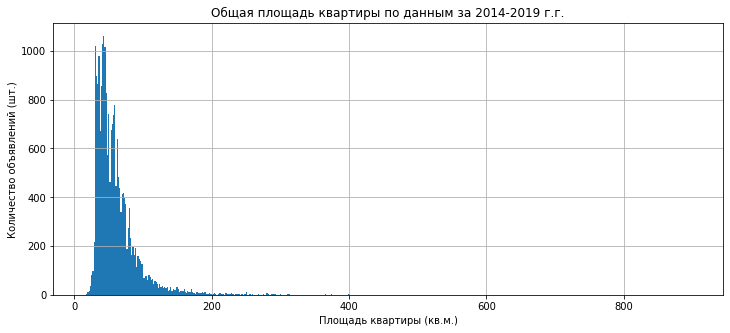

In [29]:
df['total_area'].plot(
    kind='hist',
    alpha=1.0,
    bins=500,
    title='Общая площадь квартиры по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(12,5),
    fontsize=10)
plt.xlabel('Площадь квартиры (кв.м.)')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

Построим диаграмму размаха или "ящик с усами" для столбца "Общая площадь"

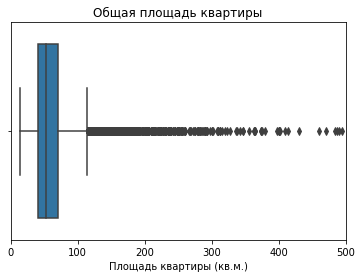

In [30]:
sns.boxplot(df.total_area)
plt.title('Общая площадь квартиры')
plt.xlim(0, 500)
plt.xlabel('Площадь квартиры (кв.м.)')
plt.show()

На графиках видно, что в объявлениях редко встречаются квартиры с площадью больше 120 кв.м., исключим их из исследования. Чтобы точнее удалить редкие и выбивающиеся значения, создадим функцию, которая посчитает межквартильный размах и определит пределы, по которым можно отсекать лишние значения.

In [31]:
# создание функции для нормального распределения
def normal_distribution(data,column):
    """Возвращает срез данных по столбцу, соответствующего диапазона:
- считает первый квантиль
- считает третий квантиль
- считает межквартильный размах - разницу между третьим и первым квантилем
- считает диапазон отсекаемых значений слева - из первого квантиля вычитает 1,5 межквартильных размаха
- считает диапазон отсекаемых значений справа как сумму третьего квантиля и 1,5 межквартильных размаха
    """
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3-q1
    return df.query(f"{(q1-1.5*iqr)}<= {column} <= {(q3+1.5*iqr)}")

In [32]:
# применяем функцию к столбцу "Общая площадь", чтобы удалить из исследования редкие значения 
df = normal_distribution(df,'total_area')
df['total_area'].describe().round(2)

count    21398.0
mean        54.7
std         19.3
min         14.0
25%         40.0
50%         50.5
75%         66.0
max        114.6
Name: total_area, dtype: float64

Построим гистограмму "Общая площадь" квартиры после удаления редких значений

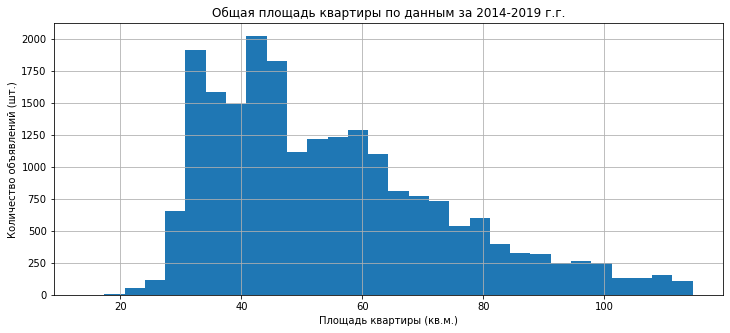

In [33]:
df['total_area'].plot(
    kind='hist',
    alpha=1.0,
    bins=30,
    title='Общая площадь квартиры по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(12,5),
    fontsize=10)
plt.xlabel('Площадь квартиры (кв.м.)')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

#### Цена

Посмотрим описательную статистику для столбца "Цена квартиры на момент снятия объявления с публикации"

In [34]:
df['last_price'].describe().round(2)

count       21398.00
mean      5396184.65
std       3402894.77
min         12190.00
25%       3450000.00
50%       4570000.00
75%       6400000.00
max      82000000.00
Name: last_price, dtype: float64

Построим гистограмму "Цена квартиры на момент снятия объявления с публикации"

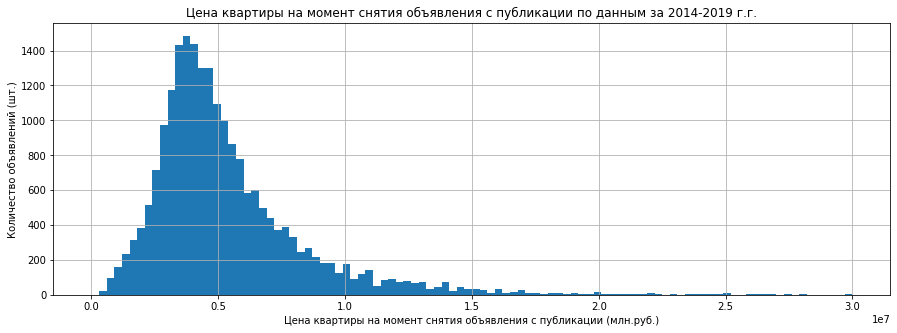

In [35]:
df['last_price'].plot(
    kind='hist',
    alpha=1.0,
    bins=100,
    range=(0, 30e+6),              
    title='Цена квартиры на момент снятия объявления с публикации по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(15,5),
    fontsize=10)
plt.xlabel('Цена квартиры на момент снятия объявления с публикации (млн.руб.)')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

Построим диаграмму размаха для столбца "Цена на момент снятия с публикации"

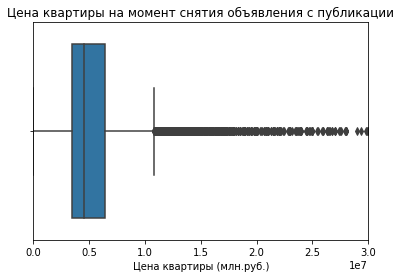

In [36]:
sns.boxplot(df.last_price)
plt.title('Цена квартиры на момент снятия объявления с публикации')
plt.xlabel('Цена квартиры (млн.руб.)')
plt.xlim(0, 3e+7)
plt.show()

На графиках видны выбросы, например, квартиры, стоимостью 50 и 80 млн.руб. Исключим их из исследования вместе с "подозрительно" дешевыми квартирами, например, 12 тыс.руб.

In [37]:
# удаление из исследования редких и выбивающихся значения в столбце "Цена на момент снятия с публикации"
df = normal_distribution(df,'last_price')
df['last_price'].describe().round(2)

count       20120.00
mean      4785913.92
std       2030344.01
min         12190.00
25%       3399750.00
50%       4425000.00
75%       5949000.00
max      10824000.00
Name: last_price, dtype: float64

Построим гистограмму "Цена квартиры на момент снятия с публикации" после удаления редких и выбивающихся значений.

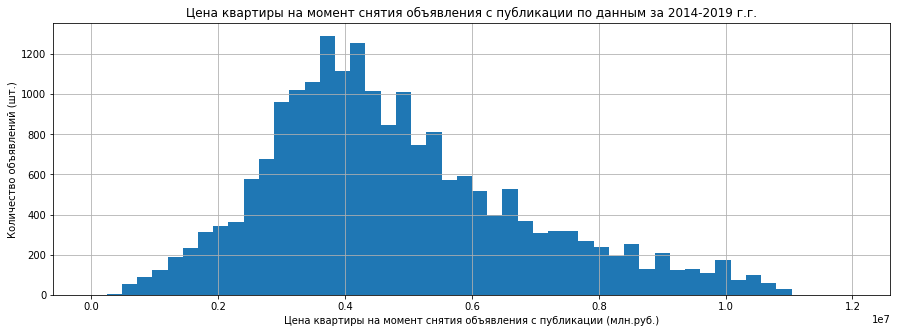

In [38]:
df['last_price'].plot(
    kind='hist',
    alpha=1.0,
    bins=50,
    range=(0, 12e+6),              
    title='Цена квартиры на момент снятия объявления с публикации по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(15,5),
    fontsize=10)
plt.xlabel('Цена квартиры на момент снятия объявления с публикации (млн.руб.)')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

#### Число комнат

Посмотрим описательную статистику для столбца "Число комнат в квартире"

In [39]:
df['number_of_rooms'].describe().round(2)

count    20120.00
mean         1.91
std          0.88
min          0.00
25%          1.00
50%          2.00
75%          3.00
max          6.00
Name: number_of_rooms, dtype: float64

Построим гистограмму "Число комнат в квартире"

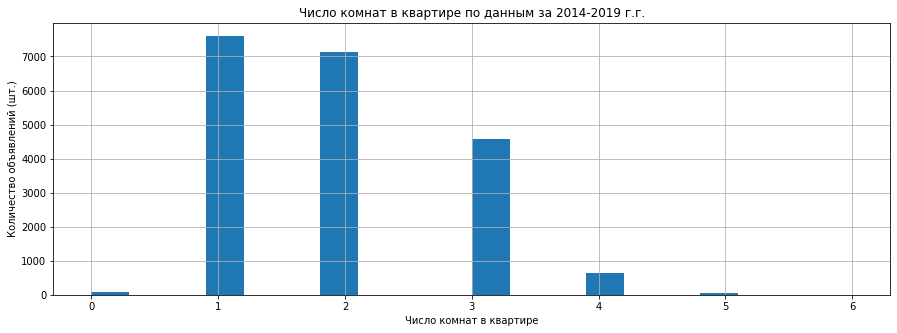

In [40]:
df['number_of_rooms'].plot(
    kind='hist',
    alpha=1.0,
    bins=20,
    title='Число комнат в квартире по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(15,5),
    fontsize=10)
plt.xlabel('Число комнат в квартире')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

Построим диаграмму размаха для столбца "Число комнат"

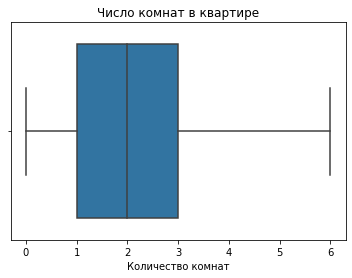

In [41]:
sns.boxplot(df.number_of_rooms)
plt.title('Число комнат в квартире')
plt.xlabel('Количество комнат')
plt.show()

Все квартиры с количеством комнат меньше 1 являются вероятнее всего ошибкой в объявлении, удалим их из исследования.

In [42]:
# удаление из исследования редких и выбивающихся значения в столбце "Количество комнат"
df = df.query('number_of_rooms >= 1')

Посмотрим описательную статистику для столбца "Число комнат в квартире" после удаления редких значений

In [43]:
df['number_of_rooms'].describe().round(2)

count    20025.00
mean         1.92
std          0.87
min          1.00
25%          1.00
50%          2.00
75%          3.00
max          6.00
Name: number_of_rooms, dtype: float64

Построим гистограмму "Число комнат в квартире"после удаления редких значений

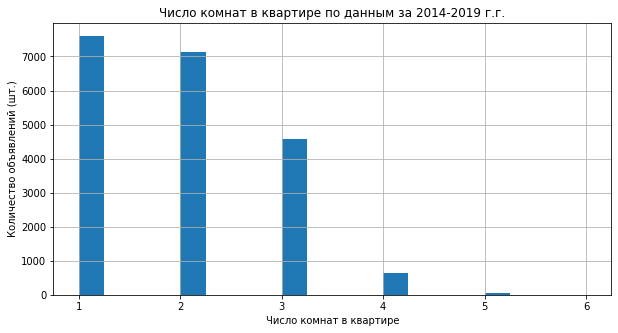

In [44]:
df['number_of_rooms'].plot(
    kind='hist',
    alpha=1.0,
    bins=20,
    title='Число комнат в квартире по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(10,5),
    fontsize=10)
plt.xlabel('Число комнат в квартире')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

#### Высота потолков

Посмотрим описательную статистику для столбца "Высота потолков"

In [45]:
df['ceiling_height'].describe().round(2)

count    20025.00
mean         2.70
std          0.82
min          1.00
25%          2.55
50%          2.70
75%          2.70
max         32.00
Name: ceiling_height, dtype: float64

Построим гистограмму "Высота потолков"

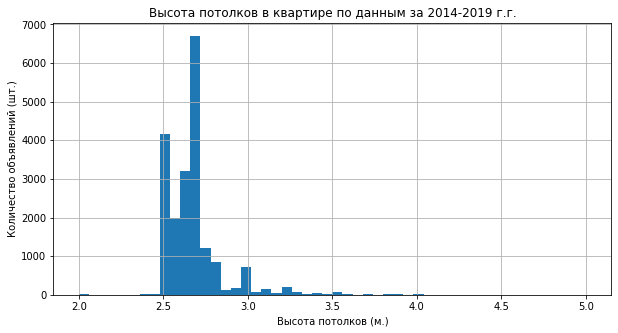

In [46]:
df['ceiling_height'].plot(
    kind='hist',
    alpha=1.0,
    bins=50,
    range=(2,5),
    title='Высота потолков в квартире по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(10,5),
    fontsize=10)
plt.xlabel('Высота потолков (м.)')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

Построим диаграмму размаха для столбца "Высота потолков"

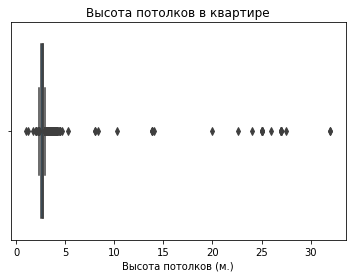

In [47]:
sns.boxplot(df.ceiling_height)
plt.title('Высота потолков в квартире')
plt.xlabel('Высота потолков (м.)')
plt.show()

Высота потолка 32 метра - вероятно это очень красиво, но для нашего исследования не подходит. Почистим данные от редких значений.

In [48]:
# удаление из исследования редких и выбивающихся значений в столбце "Высота потолков"
df = normal_distribution(df,'ceiling_height')
df['ceiling_height'].describe().round(2)

count    18412.00
mean         2.63
std          0.10
min          2.34
25%          2.55
50%          2.65
75%          2.70
max          2.92
Name: ceiling_height, dtype: float64

Построим гистограмму "Высота потолков" после удаления редких и выбивающихся значений

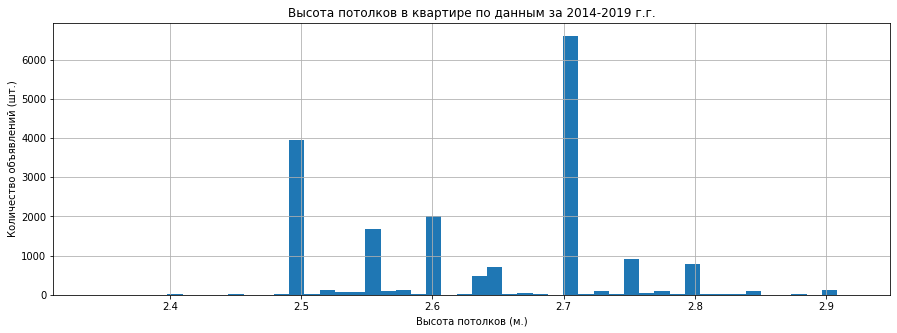

In [49]:
df['ceiling_height'].plot(
    kind='hist',
    alpha=1.0,
    bins=50,
    title='Высота потолков в квартире по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(15,5),
    fontsize=10)
plt.xlabel('Высота потолков (м.)')
plt.ylabel('Количество объявлений (шт.)')
plt.show()



### Исследование количества времени для продажи квартиры

Посмотрим описательную статистику для столбца "Сколько дней было размещено объявление"

In [50]:
df['days_exposition'].describe().round()

count    18412.0
mean       162.0
std        197.0
min          1.0
25%         45.0
50%         95.0
75%        192.0
max       1580.0
Name: days_exposition, dtype: float64

Построим гистограмму "Время продажи квартиры"

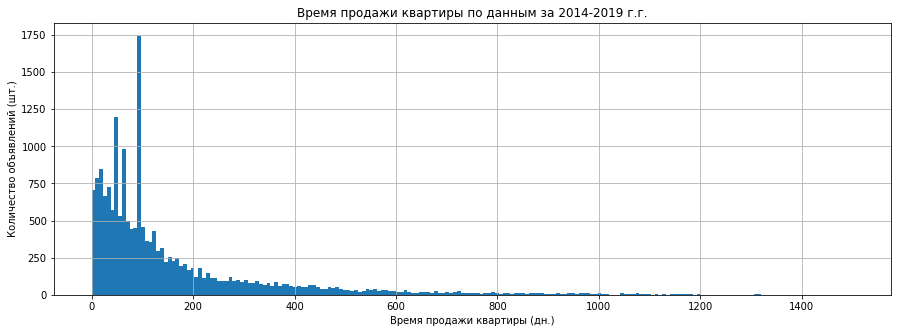

In [51]:
df['days_exposition'].plot(
    kind='hist',
    alpha=1.0,
    bins=200,
    range=(0,1500),
    title='Время продажи квартиры по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(15,5),
    fontsize=10)
plt.xlabel('Время продажи квартиры (дн.)')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

На гистограмме видим пиковые значения, посмотрим на них внимательно

In [52]:
# выявление пиковых дней продажи
df['days_exposition'].value_counts().head()

95    1289
45     716
60     444
7      191
30     175
Name: days_exposition, dtype: int64

Посчитаем среднее время продажи и медиану

In [53]:
df.agg({'days_exposition': ['mean', 'median']})

,days_exposition
mean,162.230882
median,95.000000


45, 60 и 95 дней от момента публикации объявления до продажи квартиры - возможно такие выбросы связаны с автоматическим снятием объявления с публикаци по истечению определенного срока в 2 и 3 месяца, например. А вот некоторые объявления "висят" годами. Если квартиру удалось продать меньше, чем за пару месяцев, можно считать это быстрой продажей. Необычно долгие продажи - от года и более.

### Исследование факторов, влияющих на стоимость квартиры

Рассмотрим как на стоимость квартиры влияют различные факторы. Разделим их на категориальные (этаж, на котором расположена квартира) и количественные:
- общая площадь,
- количество комнат,
- удаленность от центра,
- день недели, когда было опубликовано объявление,
- месяц публикации,
- год публикации.  

Посчитаем коэффициент корреляции Пирсона для количественных факторов. Возьмём для расчётов цену за квадратный метр, чтобы исключить влияние площади квартиры.

In [54]:
corr_matrix = df[['price_sq_meter','total_area', 'number_of_rooms', 'city_centers_nearest', 
                  'day_exposition', 'month_exposition', 'year_exposition']].corr().round(2)
display(corr_matrix)

,price_sq_meter,total_area,number_of_rooms,city_centers_nearest,day_exposition,month_exposition,year_exposition
price_sq_meter,1.00,-0.13,-0.27,-0.40,-0.00,-0.01,0.09
total_area,-0.13,1.00,0.80,-0.07,-0.00,0.01,-0.06
number_of_rooms,-0.27,0.80,1.00,-0.03,-0.00,0.00,-0.03
city_centers_nearest,-0.40,-0.07,-0.03,1.00,0.00,-0.02,0.01
day_exposition,-0.00,-0.00,-0.00,0.00,1.00,0.01,-0.00
month_exposition,-0.01,0.01,0.00,-0.02,0.01,1.00,-0.26
year_exposition,0.09,-0.06,-0.03,0.01,-0.00,-0.26,1.00


Построим матрицу корреляции, чтобы наглядно увидеть влияние количественных факторов на цену квадратного метра квартиры.

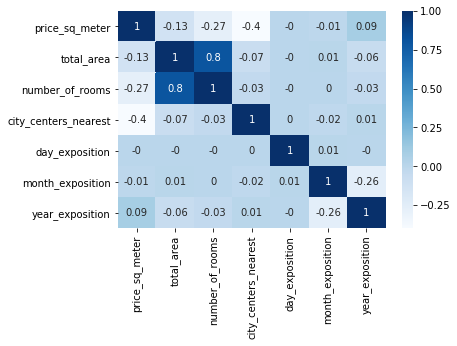

In [55]:
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='Blues')
plt.show()

Цена за квадратный метр имеет среднюю отрицательную корреляцию с количеством комнат.  
Год публикации объявления имеет слабую положительную связь с ценой.  
Точно можно утверждать, что цена не зависит от дня недели и месяца, в котором было опубликовано объявление. Либо эта связь имеет более сложный нелинейный характер.

Построим сводную таблицу "Зависимость цены за квадратный метр от количества комнат в квартире"

In [56]:
df.pivot_table(index='number_of_rooms', values='price_sq_meter').sort_values('price_sq_meter', ascending=False)

,price_sq_meter
number_of_rooms,
1,99599.844539
2,89135.601604
3,81544.834568
4,77864.748191
6,77117.306780
5,67173.204305


В однокомнатной квартире самая высокая цена за квадратный метр. Чем больше квартира - тем дешевле цена за квадратный метр.  

Посмотрим зависит ли цена от того на каком этаже расположена квартира - первом, последнем или другом. Для этого построим сводную таблицу "Зависимость цены за квадратный метр от этажа".

In [57]:
df.pivot_table(index='apartment_floor', values='price_sq_meter').sort_values('price_sq_meter', ascending=False)

,price_sq_meter
apartment_floor,
другой,95065.069517
последний,81858.691457
первый,78344.420247


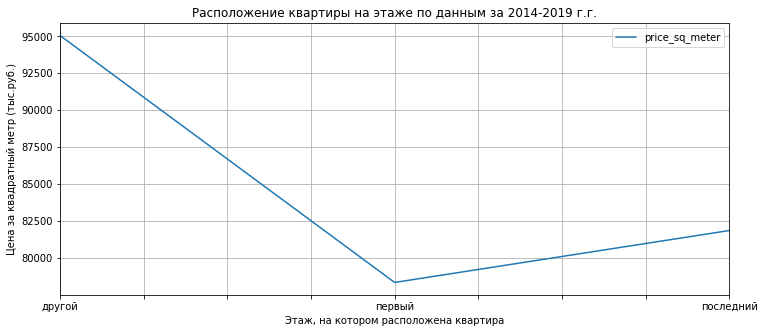

In [58]:
(
    df
    .pivot_table(index='apartment_floor', values='price_sq_meter')
    .plot(grid=True, figsize=(12, 5), title='Расположение квартиры на этаже по данным за 2014-2019 г.г.')
) 
plt.xlabel('Этаж, на котором расположена квартира')
plt.ylabel('Цена за квадратный метр (тыс.руб.)')
plt.show()

Самая низкая цена за квадратный метр у квартир, расположенных на первых этажах. 

### Анализ десяти населённых пунктов с наибольшим числом объявлений

Выберем 10 населённых пунктов с наибольшим числом объявлений и сохраним их в переменную `top_locality`

In [59]:
top_locality = df['locality_name'].value_counts().head(10).index
display(top_locality)

Index(['Санкт-Петербург', 'Мурино', 'Шушары', 'Кудрово', 'Всеволожск',
       'Парголово', 'Колпино', 'Пушкин', 'Гатчина', 'Выборг'],
      dtype='object')

In [60]:
# создание среза данных по 10 населённым пунктам с наибольшим числом объявлений и сохранение в переменную df_top_locality
df_top_locality = df.query('locality_name in @top_locality')
df_top_locality

,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition,price_sq_meter,day_exposition,month_exposition,year_exposition,apartment_floor,living_to_total_area,kitchen_to_total_area
1,3350000.0,40.40,2018-12-04,1,2.63,11,18.60,1,11.00,Шушары,18603.0,81,82920.792079,1,12,2018,первый,0.460396,0.272277
2,5196000.0,56.00,2015-08-20,2,2.70,5,34.30,4,8.30,Санкт-Петербург,13933.0,558,92785.714286,3,8,2015,другой,0.612500,0.148214
6,3700000.0,37.30,2017-11-02,1,2.64,26,10.60,6,14.40,Парголово,19143.0,155,99195.710456,3,11,2017,другой,0.284182,0.386059
7,7915000.0,71.60,2019-04-18,2,2.70,24,43.20,22,18.90,Санкт-Петербург,11634.0,95,110544.692737,3,4,2019,другой,0.603352,0.263966
8,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,8.81,Мурино,NaN,189,87454.764777,2,5,2018,другой,0.465320,0.265682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,3300000.0,31.00,2017-04-29,1,2.55,9,18.00,6,6.50,Санкт-Петербург,11602.0,193,106451.612903,5,4,2017,другой,0.580645,0.209677
23687,3200000.0,39.00,2017-12-16,1,2.70,9,20.00,6,11.00,Санкт-Петербург,16704.0,38,82051.282051,5,12,2017,другой,0.512821,0.282051
23689,3550000.0,35.30,2018-02-28,1,2.86,15,16.30,4,9.10,Санкт-Петербург,16081.0,29,100566.572238,2,2,2018,другой,0.461756,0.257790
23690,5500000.0,52.00,2018-07-19,2,2.70,5,31.00,2,6.00,Санкт-Петербург,6263.0,15,105769.230769,3,7,2018,другой,0.596154,0.115385


Создадим сводную таблицу "Средняя цена за квадратный метр" в 10 населённых пунктах с наибольшим числом объявлений

In [61]:
df_top_locality.pivot_table(index='locality_name', values='price_sq_meter', 
                            aggfunc='mean').sort_values('price_sq_meter', ascending = False).round(2)

,price_sq_meter
locality_name,
Санкт-Петербург,103959.43
Пушкин,99758.01
Кудрово,94680.77
Парголово,90474.31
Мурино,85118.90
Шушары,78292.19
Колпино,75151.46
Гатчина,68349.30
Всеволожск,66899.92


Самая высокая цена в г.Санкт-Петербург составляет 104 410,30 руб. за квадратный метр в г.Санкт-Петербург, самая низкая цена в г.Красное Село составляет 72 100,68 руб. за квадратный метр.

### Анализ изменения цены по степени удалённости от центра

Выделим квартиры в Санкт-Петербурге и сохраним срез данных в переменную df_spb

In [62]:
df_spb = df.query('locality_name == "Санкт-Петербург"')
df_spb.head()

,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition,price_sq_meter,day_exposition,month_exposition,year_exposition,apartment_floor,living_to_total_area,kitchen_to_total_area
2,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,8.3,Санкт-Петербург,13933.0,558,92785.714286,3,8,2015,другой,0.612500,0.148214
7,7915000.0,71.6,2019-04-18,2,2.70,24,43.2,22,18.9,Санкт-Петербург,11634.0,95,110544.692737,3,4,2019,другой,0.603352,0.263966
9,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,6.5,Санкт-Петербург,15008.0,289,88524.590164,6,2,2017,другой,0.714754,0.106557
10,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,8.5,Санкт-Петербург,13878.0,137,127525.252525,3,11,2017,другой,0.512626,0.214646
15,4650000.0,39.0,2017-11-18,1,2.70,14,20.5,5,7.6,Санкт-Петербург,14259.0,19,119230.769231,5,11,2017,другой,0.525641,0.194872


Создадим и добавим в таблицу столбец "Расстояние до центра в километрах"

In [63]:
df_spb['centers_nearest'] = (df_spb['city_centers_nearest']/1000).round(0)
df_spb.head()
pd.set_option('mode.chained_assignment', None)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Построим график средней цены для каждого километра

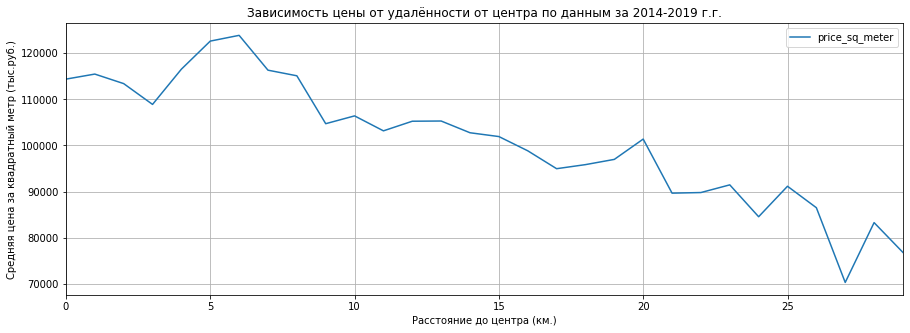

In [64]:
df_spb.pivot_table(
    index='centers_nearest', 
    values='price_sq_meter', 
    aggfunc='mean').plot(
    grid=True, 
    figsize=(15, 5), 
    title='Зависимость цены от удалённости от центра по данным за 2014-2019 г.г.')
plt.xlabel('Расстояние до центра (км.)')
plt.ylabel('Средняя цена за квадратный метр (тыс.руб.)')
plt.show()

График "Зависимость цены от удалённости" от центра показывает, что средняя цена за квадратный метр снижается почти равномерно с удалением от центра.  
Выделим центральную зону 6 км. для дальнейшего исследования. 

### Сравнение выводов по квартирам в центре и общих выводов по всему городу

Выделим сегмент квартир, расположенных в центре г.Санкт-Петербург и сохраним в переменную `df_spb_center`

In [65]:
df_spb_center = df_spb.query('centers_nearest <= 6')
df_spb_center.head()

,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition,price_sq_meter,day_exposition,month_exposition,year_exposition,apartment_floor,living_to_total_area,kitchen_to_total_area,centers_nearest
24,6500000.0,97.2,2015-10-31,2,2.7,3,46.5,1,19.6,Санкт-Петербург,2336.0,265,66872.427984,5,10,2015,первый,0.478395,0.201646,2.0
61,7990000.0,74.0,2017-08-24,2,2.7,4,43.0,4,20.0,Санкт-Петербург,4288.0,609,107972.972973,3,8,2017,последний,0.581081,0.270270,4.0
99,9600000.0,90.0,2017-09-26,4,2.7,5,67.0,2,8.0,Санкт-Петербург,2818.0,104,106666.666667,1,9,2017,другой,0.744444,0.088889,3.0
111,4590000.0,40.0,2017-05-29,1,2.7,6,18.0,1,10.0,Санкт-Петербург,6175.0,31,114750.000000,0,5,2017,первый,0.450000,0.250000,6.0
114,4000000.0,21.4,2019-02-07,1,2.9,8,8.3,7,6.3,Санкт-Петербург,5791.0,95,186915.887850,3,2,2019,другой,0.387850,0.294393,6.0


Посмотрим описательную статистику для квартир в центре Санкт-Петербурга

In [66]:
df_spb_center[['total_area', 'last_price', 'number_of_rooms', 'ceiling_height']].describe()

,total_area,last_price,number_of_rooms,ceiling_height
count,1079.000000,1.079000e+03,1079.000000,1079.000000
mean,61.035514,6.968407e+06,2.136237,2.709222
std,19.618414,1.893971e+06,0.921287,0.081741
min,17.000000,1.900000e+06,1.000000,2.400000
25%,45.000000,5.500000e+06,1.000000,2.700000
50%,59.400000,6.880000e+06,2.000000,2.700000
75%,74.000000,8.492500e+06,3.000000,2.700000
max,114.200000,1.082400e+07,6.000000,2.920000


Портрет "средней" квартиры в центре Санкт-Петербурга:
- общая площадь 62 кв.м.,
- цена 7,2 млн.руб., 
- 2 комнаты,
- высота потолков 2,7 м.


Сравним как количественные факторы влияют на цену квартиры в центре и в общем по городу.

In [67]:
# вычисление коэффициента корреляции Пирсона по г. Санкт-Петербург
corr_matrix_spb = df_spb[['price_sq_meter', 'number_of_rooms', 'city_centers_nearest', 
                  'day_exposition']].corr()[['price_sq_meter']].round(2).reset_index()

# вычисление коэффициента корреляции Пирсона для центральной части г. Санкт-Петербург
corr_matrix_spb_center = df_spb_center[['price_sq_meter', 'number_of_rooms', 'city_centers_nearest', 
                  'day_exposition']].corr()[['price_sq_meter']].round(2).reset_index()

Объединим данные о корреляции в центре Санкт-Петербурга с данными по всему городу для наглядного сравнения.

In [68]:
spb_vs_center_corr = corr_matrix_spb.merge(corr_matrix_spb_center, on = 'index')

# переименование столбцов после объединения
spb_vs_center_corr = spb_vs_center_corr.rename(columns={'price_sq_meter_x':'город',
                                                        'price_sq_meter_y':'центр'})
display(spb_vs_center_corr)

,index,город,центр
0,price_sq_meter,1.00,1.00
1,number_of_rooms,-0.41,-0.55
2,city_centers_nearest,-0.29,0.14
3,day_exposition,0.00,0.02


По данным таблицы корреляции мы видим, что:
- отрицательная взаимосвязь между количеством комнат и ценой за квадратный метр сильнее в центре Санкт-Петербурга, чем во всем городе,
- утверждение, что "цена не зависит от дня недели, в который было размещено объявление" справедливо и для центральной части и для всего города.

In [69]:
# создание сводной таблицы зависимости цены от этажа по всему городу и сохранение её в переменную spb_pivot
spb_pivot = df_spb.pivot_table(index='apartment_floor', 
                               values='price_sq_meter').sort_values('price_sq_meter', ascending=False)

# создание сводной таблицы зависимости цены от этажа по центру города и сохранение её в переменную spb_center_pivot
spb_center_pivot = df_spb_center.pivot_table(index='apartment_floor', 
                                             values='price_sq_meter').sort_values('price_sq_meter', ascending=False)

In [70]:
# объединение столбцов сводных таблиц по центру и по всему городу
spb_vs_center = spb_pivot.merge(spb_center_pivot, on = 'apartment_floor')

# переименование столбцов после объединения для наглядного сравнения
spb_vs_center = spb_vs_center.rename(columns={'price_sq_meter_x':'город', 'price_sq_meter_y':'центр'})
display(spb_vs_center.round(2))

,город,центр
apartment_floor,,
другой,105935.25,123492.94
последний,100023.78,111919.50
первый,93370.06,107574.80


Данные в таблице показывают:
- цена за квадратный метр в центре выше, чем по городу,
- утверждение "самая низкая цена за квадратный метр в квартирах, расположенных на первом этаже" справедливо и для центральной части и для всего города.

**Вывод**

Исследовательский анализ данных показывает:
- исходные данные содержат множество выбросов, похожих на ошибки и редко встречающиеся значения, поэтому такие данные исключили из анализа,
- "пики" продаж приходятся на 45, 60 и 95 день после публикации объявления, предположительно это техническая ошибка, связанная с тем, что объявления автоматически снимают с публикации по истечении опеределенного времени. Необходимо уточнить этот вопрос у разработчиков,
- цена не зависит от дня публикации объявления,
- наличие средней отрицательной взаимосвязи между ценой за квадратный метр и количеством комнат в кваритре. То есть чем больше квартира - тем меньше цена за квадратный метр,
- квадратный метр квартир, расположенных на первом этаже, дешевле, чем у квартир на других этажах,
- из 10 городов с самым большим количеством продаваемых квартир, самое дорогое жилье в г. Санкт-Петербург, а самое дешевое - в г. Красное село,
- в центральной части г. Санкт-Петербург цена за квадратный метр в центре выше, чем по всему городу.

## Общий вывод

Объект нашего исследования - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Поскольку о качестве данных, которые мы получили от сервиса Яндекс.Недвижимость, ничего не было известно, мы провели обзор данных, чтобы выделить явные неточности.

Мы проверили архив на ошибки и оценили их влияние на исследование. Предобработка данных обнаружила несколько проблем:
1. нарушения в стиле заголовков,
2. пропущенные значения,
3. некорректный тип данных,
4. неявные дубликаты, 
5. аномальные значения, которые не отражают действительность.

Самые критичные ошибки данных мы исправили:
* заполнили пропущенные значения в столбцах "Высота потолков", "Жилая площадь", "Площадь кухни", "Расстояние до центра города", "Сколько дней было размещено объявление" на медиану по каждому населенному пункту, чтобы сделать исследование более точным.
* поменяли тип данных с вещественного на целочисленный для столбцов "Всего этажей в доме", "Сколько дней было размещено объявление"; 
* удалили неявные дубликаты в столбце "Название населённого пункта".

Сделали дополнительные расчёты:
* цена квадртаного метра - чтобы исключить влияние площади квартиры,
* день недели, месяц, год публикации объявления, чтобы узнать как зависит цена от дня размещения объявления,

Провели категоризацию данных по расположению кватиры на этаже, выделили три категории - первый, последний, другой.

Таким образом, исследование проводили в четыре этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Расчеты и добавление результатов в таблицу.
 4. Исследовательский анализ данных.

По результатам исследования архива объявлений о продаже недвижимости в Санкт-Петербурге и соседних населенных пунктах за несколько лет, мы установили, что:
* в однокомнатной квартире самая высокая цена за квадратный метр. Чем меньше квартира - тем дороже цена за квадратный метр;
* стоимость квартиры, расположенной на первом этаже, ниже, чем на последнем и других этажах;
* дата размещения объявления не влияет на стоимость квартиры;
* продажу квартиры, которая проходила меньше двух месяцев, можной назвать быстрой продажей;
* из 10 городов с самым большим количеством продаваемых квартир, самое дорогое жилье в г. Санкт-Петербург, а самое дешевое - в г. Красное село;
* в центральной части Санкт-Петербурга цена за квадратный метр в центре выше, чем по всему городу.

Подведём итоги нашей работы - несколько рекомендаций для сервиса Яндекс.Недвижимость:

* Обратить внимание на "пиковые" сроки снятия объявления с публикации - 45, 60 и 95. Выяснить может ли это быть технической ошибкой или имеет иной характер. 

* Предоставить возможность при заполнении характеристик квартиры выбирать некоторые параметры из выпадающего списка, чтобы исключить опечатки, ошибки.

* Сделать обязательным для заполнения параметр "Название населенного пункта". Такие объявления, из которых непонятно местоположение квартиры, покупатели могут просто игнорировать и продажи затянутся.

# Исследование объявлений о продаже квартир 

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Импортируем библиотеки, с которыми будем работать

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Сохраняем данные в переменную df

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv')
display(df.head(10))

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Данные представлены в виде склеенной строки, поэтому применим в качестве разделителя столбцов знак табуляции и выведем на экран первые 10 строк таблицы. <a id='intro'></a>

In [3]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Посмотрим общую информацию о данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Посмотрим описательную статистику по каждому столбцу датафрейма

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

В таблице "Архив объявлений о продаже квартир" 23699 строк и 22 столбца. В двух столбцах тип данных - bool, в 14 столбцах - float64, по три столбца типа int64 и object.
В столбце "Число комнат" обнаружены значения, равные нулю, что противоречит логике, т.к. количество комнат в квартире не может быть меньше единицы. Предположим, что такие ошибки обусловлены человеческим фактором. Всего таких "неправильных" квартир меньше 1%, поэтому данные не могут серьезно повлиять на результаты исследований, следовательно можем оставить их без изменений.
Количество значений в столбцах различается. Значит, в данных есть пропущенные значения. 

## Предобработка данных

### Стиль заголовков

Посмотрим названия столбцов нашей таблицы

In [6]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Столбцы "Количество комнат" и "Расстояние до центра города" переименуем в соответствии со змеиным стилем.

In [7]:
df = df.rename(columns={'rooms': 'number_of_rooms', 'cityCenters_nearest': 'city_centers_nearest'})

In [8]:
# проверка переименованных столбцов
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'number_of_rooms', 'ceiling_height', 'floors_total', 'living_area',
       'floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area',
       'balcony', 'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Привели названия столбцов в  соответствие с хорошим стилем.

### Пропуски значений

Убедимся, что данные по общей площади квартиры  не превышают сумму жилой площади и площади кухни до того как обработаем пропуски.

In [9]:
df_filtr_before = df.query('total_area < (living_area+kitchen_area)')
df_filtr_before

,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,...,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,NaN,18.0,20.00,9,NaN,...,5.00,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,NaN,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,NaN,...,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,NaN,...,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21824,20,2450000.0,44.00,2019-02-12T00:00:00,2,27.00,2.0,38.00,2,False,...,8.60,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21868,12,2600000.0,34.30,2018-09-26T00:00:00,1,2.50,9.0,30.60,6,NaN,...,8.00,2.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,107.0
21915,14,11990000.0,91.40,2016-05-16T00:00:00,2,NaN,16.0,62.00,12,NaN,...,32.40,0.0,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,93.0
21956,0,5200000.0,46.00,2018-07-20T00:00:00,2,NaN,5.0,44.00,5,NaN,...,8.00,1.0,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0.0,NaN,7.0


Всего в исходных данных 64 объявления, в которых общая площадь квартиры больше, чем сумма жилой площади и площади кухни. Вероятно такие ошибочные данные появились из-за неточности в расчетах или возникли при публикации объявления как опечатки в заполнении нужных параметров пользователями.

Посчитаем количество пропущенных значений в каждом из столбцов датафрейма.

In [10]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
number_of_rooms             0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Мы обнаружили в объявлениях много пропущенных значений. Заполним пропуски на медиану по каждому населенному пункту в столбцах:  
* "Высота потолков",
* "Растояние до центра города",
* "Сколько дней было размещено объявление".  

В столбцах "Жилая площадь" и "Площадь кухни" заполним пропуски на медиану по каждому населенному пункту и по общей площади квартиры.

In [11]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('locality_name')['ceiling_height'].transform('median'))
df['living_area'] = df['living_area'].fillna(df.groupby(['locality_name','total_area'])['living_area'].transform('median'))
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby(['locality_name','total_area'])['kitchen_area'].transform('median')) 
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(df.groupby('locality_name')['city_centers_nearest'].transform('median'))
df['days_exposition'] = df['days_exposition'].fillna(df.groupby('locality_name')['days_exposition'].transform('median'))

# проверка замены пропущенных значений
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
number_of_rooms             0
ceiling_height            156
floors_total               86
living_area               560
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area              701
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5394
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition            81
dtype: int64

Убедимся, что данные по общей площади квартиры  не превышают сумму жилой площади и площади кухни после замены пропущенных значений.

In [12]:
df_filtr_after = df.query('total_area < (living_area+kitchen_area)')
df_filtr_after

,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,...,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
424,14,11500000.0,98.00,2016-05-10T00:00:00,3,2.65,3.0,88.00,3,False,...,13.60,1.0,Санкт-Петербург,39363.0,13270.0,0.0,NaN,0.0,NaN,90.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,2.70,18.0,20.00,9,NaN,...,5.00,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,NaN,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,NaN,...,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21915,14,11990000.0,91.40,2016-05-16T00:00:00,2,2.70,16.0,62.00,12,NaN,...,32.40,0.0,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,93.0
21956,0,5200000.0,46.00,2018-07-20T00:00:00,2,2.70,5.0,44.00,5,NaN,...,8.00,1.0,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0.0,NaN,7.0
22095,6,2194000.0,36.50,2017-09-27T00:00:00,1,2.70,3.0,33.20,3,NaN,...,8.85,0.0,Санкт-Петербург,39446.0,18500.0,0.0,NaN,2.0,639.0,36.0
22246,6,3100000.0,27.30,2018-05-29T00:00:00,0,2.70,16.0,23.30,15,NaN,...,7.50,1.0,Санкт-Петербург,41935.0,9551.0,0.0,NaN,0.0,NaN,59.0


После замены пропущенных значений увеличилось до 104 количество объявлений, в которых общая площадь квартиры превышает сумму жилой площади и кухни. Поскольку в исходных данных такие ошибки встречались и у нас нет инструментов, чтобы достоверно исправить данные, оставим такие неточности без изменений (тем более существенно на ход исследования они не повляют). 

Пропущенные значения в столбцах:
* "Площадь кухни", 
* "Жилая площадь", 
* "Всего этажей в доме",
* "Количество дней размещения объявления",
* "Высота потолков" рассчитать не можем, поэтому удалим строки с пропущенными значениями в этих столбцах. 

Пропуски в столбце "Название населенного пункта" тоже удаляем, такие объявления неинформативны для покупателей квартиры и для нашего исследования тоже.

In [13]:
df = df.dropna(subset=['kitchen_area',
                       'living_area', 
                       'floors_total', 
                       'days_exposition', 
                       'ceiling_height', 
                       'locality_name'])

# проверка удаления пропущенных значений
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
number_of_rooms             0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            19905
studio                      0
open_plan                   0
kitchen_area                0
balcony                 10862
locality_name               0
airports_nearest         4818
city_centers_nearest     4683
parks_around3000         4794
parks_nearest           14655
ponds_around3000         4794
ponds_nearest           13702
days_exposition             0
dtype: int64

Удалим столбцы, не участвующие в исследовании:
* "Расстояние до аэропорта",
* "Количество балконов", 
* "Апартаменты",
* "Свободная планировка", 
* "Число парков в радиусе 3 км", 
* "Расстояние до ближайшего парка", 
* "Число водоёмов в радиусе 3 км",
* "Расстояние до ближайшего водоёма", 
* "Квартира-студия", 
* "Число фотографий квартиры в объявлении".

Тем более, что они содержат значительно много пропущенных значений. У нас нет никаких оснований полагать, что мы их достоверно можем восстановить на основе имеющихся данных

In [14]:
df = df.drop(['airports_nearest', 'balcony','is_apartment', 'open_plan', 'parks_around3000',
              'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'studio', 'total_images'], 1)
df.head()

,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition
0,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,25.0,Санкт-Петербург,16028.0,95.0
1,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11.0,18.6,1,11.0,посёлок Шушары,18603.0,81.0
2,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5.0,34.3,4,8.3,Санкт-Петербург,13933.0,558.0
3,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14.0,99.0,9,15.0,Санкт-Петербург,6800.0,424.0
4,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,41.0,Санкт-Петербург,8098.0,121.0


### Тип данных

Заменим вещественный тип данных в столбцах "Сколько дней было размещено объявление", "Всего этажей в доме" на целочисленный тип данных

In [15]:
df['days_exposition'] = df['days_exposition'].astype('int16')
df['floors_total'] = df['floors_total'].astype('int16')
df['number_of_rooms'] = df['number_of_rooms'].astype('int16')
df['floor'] = df['floor'].astype('int16')
df['locality_name'] = df['locality_name'].astype('category')
# проверка замены
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22573 entries, 0 to 23698
Data columns (total 12 columns):
last_price              22573 non-null float64
total_area              22573 non-null float64
first_day_exposition    22573 non-null object
number_of_rooms         22573 non-null int16
ceiling_height          22573 non-null float64
floors_total            22573 non-null int16
living_area             22573 non-null float64
floor                   22573 non-null int16
kitchen_area            22573 non-null float64
locality_name           22573 non-null category
city_centers_nearest    17890 non-null float64
days_exposition         22573 non-null int16
dtypes: category(1), float64(6), int16(4), object(1)
memory usage: 1.6+ MB


Количество дней размещения объявления и количество этажей не может быть дробным, поэтому мы заменили тип данных с вещественного на целочисленнй.

### Дубликаты

In [16]:
# проверка на дубликаты
df.duplicated().sum()

0

Явных дубликатов нет, проверим неявные дубликаты в столбце "Название населенного пункта"

In [17]:
# поиск уникальных значений в столбце "Название населенного пункта"
df['locality_name'].sort_values().unique()

[Бокситогорск, Волосово, Волхов, Всеволожск, Выборг, ..., садовое товарищество Рахья, село Копорье, село Павлово, село Путилово, село Русско-Высоцкое]
Length: 258
Categories (258, object): [Бокситогорск, Волосово, Волхов, Всеволожск, ..., село Копорье, село Павлово, село Путилово, село Русско-Высоцкое]

In [18]:
df['locality_name'].value_counts()

Санкт-Петербург                  15464
посёлок Мурино                     443
посёлок Шушары                     422
Всеволожск                         374
Пушкин                             354
                                 ...  
поселок Возрождение                  1
посёлок Ленинское                    1
посёлок Лисий Нос                    1
поселок Гладкое                      1
поселок Пансионат Зелёный Бор        1
Name: locality_name, Length: 258, dtype: int64

Название одного и того же населенного пункта может быть записано по-разному из-за букв "е" и "ё" в словах "поселок" и "посёлок".  
Заменим "ё" на "е".

In [19]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [20]:
df['locality_name'].value_counts()

Санкт-Петербург                        15464
поселок Мурино                           472
поселок Шушары                           422
Всеволожск                               374
Пушкин                                   354
                                       ...  
поселок Гончарово                          1
поселок городского типа Кондратьево        1
деревня Суоранда                           1
поселок Совхозный                          1
поселок Серебрянский                       1
Name: locality_name, Length: 236, dtype: int64

Было 258 названий, стало 236. Неявных дубликатов стало меньше.

Уберём теперь типы населённых пунктов, оставим одни названия. Потому что "городской поселок Мга" и "поселок городского типа Мга" - это один населённый пункт, только из-за некорректного написания дублируется. Для этого создадим функцию, которая удалит слова, написанные строчными буквами в столбце "Название населённого пункта".

In [21]:
# импортируем специальный модуль re
import re 

# функция only_upper вернет копию строки, с заменой слов, написанных строчными буквами и удалит пробелы в начале и конце строки
def only_upper(row):
    return re.sub(r'\b[а-я]+\s*', "", row['locality_name']).strip()
df['locality_name'] = df.apply(only_upper, axis=1)

# проверяем работу функции
df['locality_name'].value_counts()

Санкт-Петербург    15464
Мурино               472
Шушары               422
Кудрово              405
Всеволожск           374
                   ...  
Совхозный              1
Платформа 69-          1
Рапполово              1
Гладкое                1
Коробицыно             1
Name: locality_name, Length: 223, dtype: int64

Было 236 названий, стало 223, мы избавились от неявных дубликатов.

### Вывод

В ходе предобработки данных мы обнаружили несколько проблем:

- нарушения в стиле заголовков,
- пропущенные значения,
- некорректный тип данных,
- неявные дубликаты.

Мы исправили заголовки, чтобы упростить работу с таблицей, заменили тип данных. Без дубликатов исследование станет более точным.

Пропущенные значения мы заменили на медиану в тех столбцах, где это было возможно рассчитать. Предположительно большое количество пропусков связано с техническими ошибками - все геоданных были получены автоматически на основе картографических данных. Часть пропущенных значений о планировке и расположении квартир вероятно вызвана человеческим фактором при размещении объявлений - пользователи или невнимательно заполняют данные или умышленно не указывают некоторые характеристики квартир.

Приступим к исследованию.

## Расчёты и добавление результатов в таблицу

Рассчитаем цену квадратного метра и добавим в таблицу новый столбец "Цена квадратного метра".

In [22]:
df['price_sq_meter'] = df['last_price']/df['total_area']

df.head()

,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition,price_sq_meter
0,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,25.0,Санкт-Петербург,16028.0,95,120370.370370
1,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11,18.6,1,11.0,Шушары,18603.0,81,82920.792079
2,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5,34.3,4,8.3,Санкт-Петербург,13933.0,558,92785.714286
3,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14,99.0,9,15.0,Санкт-Петербург,6800.0,424,408176.100629
4,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,41.0,Санкт-Петербург,8098.0,121,100000.000000


Переведём значения в столбце "Дата публикации" к формату даты и времени. Добавим столбцы:
* "День недели публикации объявления", 
* "Месяц публикации объявления", 
* "Год публикации объявления"

In [23]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

df['day_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

#проверка
df.head()

,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition,price_sq_meter,day_exposition,month_exposition,year_exposition
0,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,Санкт-Петербург,16028.0,95,120370.370370,3,3,2019
1,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,11.0,Шушары,18603.0,81,82920.792079,1,12,2018
2,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,8.3,Санкт-Петербург,13933.0,558,92785.714286,3,8,2015
3,64900000.0,159.0,2015-07-24,3,2.70,14,99.0,9,15.0,Санкт-Петербург,6800.0,424,408176.100629,4,7,2015
4,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,Санкт-Петербург,8098.0,121,100000.000000,1,6,2018


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22573 entries, 0 to 23698
Data columns (total 16 columns):
last_price              22573 non-null float64
total_area              22573 non-null float64
first_day_exposition    22573 non-null datetime64[ns]
number_of_rooms         22573 non-null int16
ceiling_height          22573 non-null float64
floors_total            22573 non-null int16
living_area             22573 non-null float64
floor                   22573 non-null int16
kitchen_area            22573 non-null float64
locality_name           22573 non-null object
city_centers_nearest    17890 non-null float64
days_exposition         22573 non-null int16
price_sq_meter          22573 non-null float64
day_exposition          22573 non-null int64
month_exposition        22573 non-null int64
year_exposition         22573 non-null int64
dtypes: datetime64[ns](1), float64(7), int16(4), int64(3), object(1)
memory usage: 2.4+ MB


Добавим категории этажа, на котором расположена квартира, в отдельный столбец "Этаж квартиры". Напишем функцию, которая вернет три категории:
* первый, 
* последний, 
* другой.

In [25]:
def apartment_floor(data):
    if data['floor'] == data['floors_total']:
        return 'последний'
    if data['floor'] == 1:
        return 'первый'
    return 'другой'
 
df['apartment_floor'] = df.apply(apartment_floor, axis=1)

# проверка
df.head()

,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition,price_sq_meter,day_exposition,month_exposition,year_exposition,apartment_floor
0,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,Санкт-Петербург,16028.0,95,120370.370370,3,3,2019,другой
1,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,11.0,Шушары,18603.0,81,82920.792079,1,12,2018,первый
2,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,8.3,Санкт-Петербург,13933.0,558,92785.714286,3,8,2015,другой
3,64900000.0,159.0,2015-07-24,3,2.70,14,99.0,9,15.0,Санкт-Петербург,6800.0,424,408176.100629,4,7,2015,другой
4,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,Санкт-Петербург,8098.0,121,100000.000000,1,6,2018,другой


Добавим столбцы "Соотношение жилой и общей площади" и "Отношение площади кухни к общей площади"

In [26]:
df['living_to_total_area'] = df['living_area']/df['total_area']
df['kitchen_to_total_area'] = df['kitchen_area']/df['total_area']

# проверка
df.head()

,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition,price_sq_meter,day_exposition,month_exposition,year_exposition,apartment_floor,living_to_total_area,kitchen_to_total_area
0,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,Санкт-Петербург,16028.0,95,120370.370370,3,3,2019,другой,0.472222,0.231481
1,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,11.0,Шушары,18603.0,81,82920.792079,1,12,2018,первый,0.460396,0.272277
2,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,8.3,Санкт-Петербург,13933.0,558,92785.714286,3,8,2015,другой,0.612500,0.148214
3,64900000.0,159.0,2015-07-24,3,2.70,14,99.0,9,15.0,Санкт-Петербург,6800.0,424,408176.100629,4,7,2015,другой,0.622642,0.094340
4,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,Санкт-Петербург,8098.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000


Мы добавили к таблице необходимые для дальнейшего исследования расчёты. Теперь рассмотрим подробнее столбцы "Общая площадь", "Цена на момент снятия публикации", "Число комнат", "Высота потолков"

## Исследовательский анализ данных

### Исследование площади, цены, числа комнат, высоты потолков

Проанализируем описательную статистику для исследуемых столбцов

In [27]:
df[['total_area', 'last_price', 'number_of_rooms', 'ceiling_height']].describe()

,total_area,last_price,number_of_rooms,ceiling_height
count,22573.000000,2.257300e+04,22573.000000,22573.000000
mean,60.482063,6.593506e+06,2.082842,2.735947
std,34.564990,1.075416e+07,1.072820,1.032493
min,14.000000,1.219000e+04,0.000000,1.000000
25%,40.200000,3.500000e+06,1.000000,2.550000
50%,52.000000,4.700000e+06,2.000000,2.700000
75%,70.000000,6.850000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,100.000000


Видим необычные значения:
* общая площадь 900 квадратных метров,
* количество комнат 0 - совсем нелогично, не может быть меньше 1,
* помещения с высотой потолка 1 метр и 100 метров.  

Проанализируем каждый параметр в отдельности.

#### Общая площадь

Посмотрим описательную статистику для столбца "Общая площадь"

In [28]:
df['total_area'].describe().round(2)

count    22573.00
mean        60.48
std         34.56
min         14.00
25%         40.20
50%         52.00
75%         70.00
max        900.00
Name: total_area, dtype: float64

Построим гистограмму "Общая площадь квартиры"

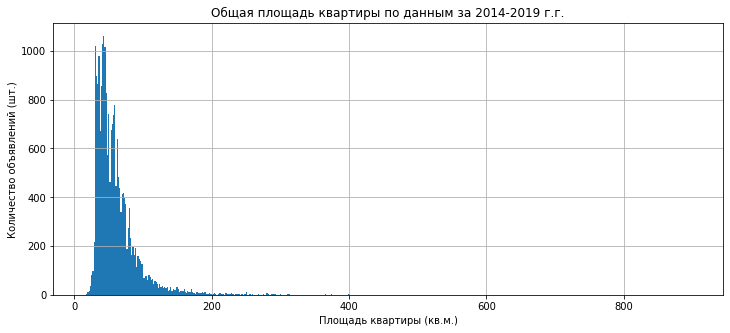

In [29]:
df['total_area'].plot(
    kind='hist',
    alpha=1.0,
    bins=500,
    title='Общая площадь квартиры по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(12,5),
    fontsize=10)
plt.xlabel('Площадь квартиры (кв.м.)')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

Построим диаграмму размаха или "ящик с усами" для столбца "Общая площадь"

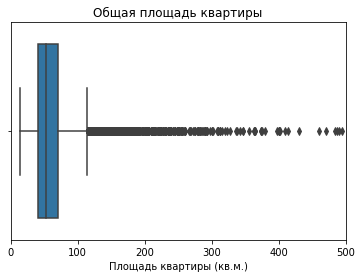

In [30]:
sns.boxplot(df.total_area)
plt.title('Общая площадь квартиры')
plt.xlim(0, 500)
plt.xlabel('Площадь квартиры (кв.м.)')
plt.show()

На графиках видно, что в объявлениях редко встречаются квартиры с площадью больше 120 кв.м., исключим их из исследования. Чтобы точнее удалить редкие и выбивающиеся значения, создадим функцию, которая посчитает межквартильный размах и определит пределы, по которым можно отсекать лишние значения.

In [31]:
# создание функции для нормального распределения
def normal_distribution(data,column):
    """Возвращает срез данных по столбцу, соответствующего диапазона:
- считает первый квантиль
- считает третий квантиль
- считает межквартильный размах - разницу между третьим и первым квантилем
- считает диапазон отсекаемых значений слева - из первого квантиля вычитает 1,5 межквартильных размаха
- считает диапазон отсекаемых значений справа как сумму третьего квантиля и 1,5 межквартильных размаха
    """
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3-q1
    return df.query(f"{(q1-1.5*iqr)}<= {column} <= {(q3+1.5*iqr)}")

In [32]:
# применяем функцию к столбцу "Общая площадь", чтобы удалить из исследования редкие значения 
df = normal_distribution(df,'total_area')
df['total_area'].describe().round(2)

count    21398.0
mean        54.7
std         19.3
min         14.0
25%         40.0
50%         50.5
75%         66.0
max        114.6
Name: total_area, dtype: float64

Построим гистограмму "Общая площадь" квартиры после удаления редких значений

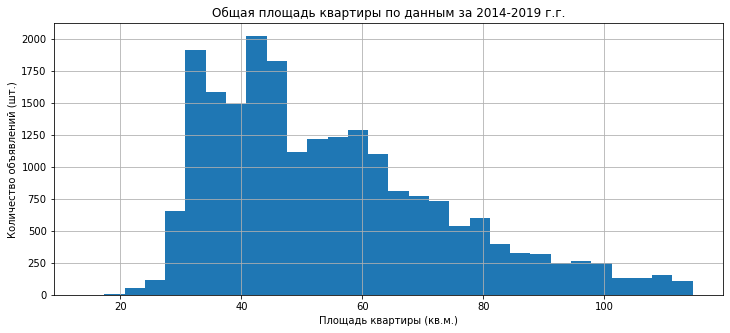

In [33]:
df['total_area'].plot(
    kind='hist',
    alpha=1.0,
    bins=30,
    title='Общая площадь квартиры по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(12,5),
    fontsize=10)
plt.xlabel('Площадь квартиры (кв.м.)')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

#### Цена

Посмотрим описательную статистику для столбца "Цена квартиры на момент снятия объявления с публикации"

In [34]:
df['last_price'].describe().round(2)

count       21398.00
mean      5396184.65
std       3402894.77
min         12190.00
25%       3450000.00
50%       4570000.00
75%       6400000.00
max      82000000.00
Name: last_price, dtype: float64

Построим гистограмму "Цена квартиры на момент снятия объявления с публикации"

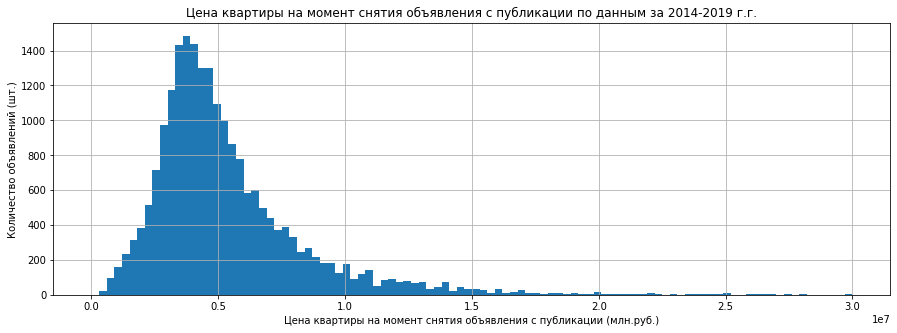

In [35]:
df['last_price'].plot(
    kind='hist',
    alpha=1.0,
    bins=100,
    range=(0, 30e+6),              
    title='Цена квартиры на момент снятия объявления с публикации по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(15,5),
    fontsize=10)
plt.xlabel('Цена квартиры на момент снятия объявления с публикации (млн.руб.)')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

Построим диаграмму размаха для столбца "Цена на момент снятия с публикации"

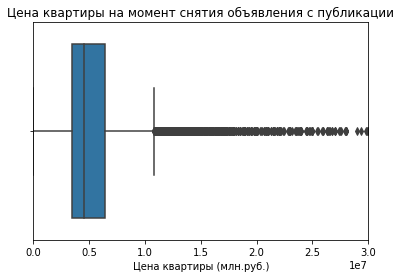

In [36]:
sns.boxplot(df.last_price)
plt.title('Цена квартиры на момент снятия объявления с публикации')
plt.xlabel('Цена квартиры (млн.руб.)')
plt.xlim(0, 3e+7)
plt.show()

На графиках видны выбросы, например, квартиры, стоимостью 50 и 80 млн.руб. Исключим их из исследования вместе с "подозрительно" дешевыми квартирами, например, 12 тыс.руб.

In [37]:
# удаление из исследования редких и выбивающихся значения в столбце "Цена на момент снятия с публикации"
df = normal_distribution(df,'last_price')
df['last_price'].describe().round(2)

count       20120.00
mean      4785913.92
std       2030344.01
min         12190.00
25%       3399750.00
50%       4425000.00
75%       5949000.00
max      10824000.00
Name: last_price, dtype: float64

Построим гистограмму "Цена квартиры на момент снятия с публикации" после удаления редких и выбивающихся значений.

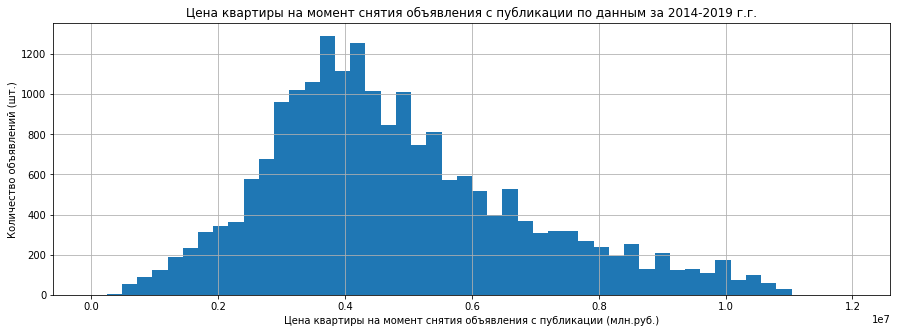

In [38]:
df['last_price'].plot(
    kind='hist',
    alpha=1.0,
    bins=50,
    range=(0, 12e+6),              
    title='Цена квартиры на момент снятия объявления с публикации по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(15,5),
    fontsize=10)
plt.xlabel('Цена квартиры на момент снятия объявления с публикации (млн.руб.)')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

#### Число комнат

Посмотрим описательную статистику для столбца "Число комнат в квартире"

In [39]:
df['number_of_rooms'].describe().round(2)

count    20120.00
mean         1.91
std          0.88
min          0.00
25%          1.00
50%          2.00
75%          3.00
max          6.00
Name: number_of_rooms, dtype: float64

Построим гистограмму "Число комнат в квартире"

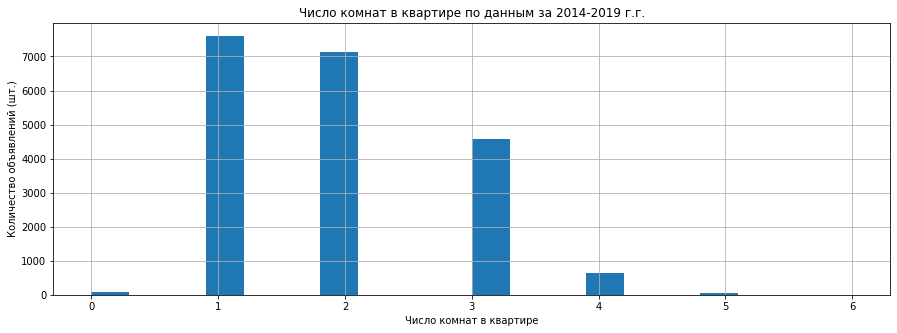

In [40]:
df['number_of_rooms'].plot(
    kind='hist',
    alpha=1.0,
    bins=20,
    title='Число комнат в квартире по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(15,5),
    fontsize=10)
plt.xlabel('Число комнат в квартире')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

Построим диаграмму размаха для столбца "Число комнат"

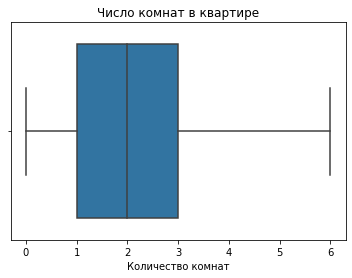

In [41]:
sns.boxplot(df.number_of_rooms)
plt.title('Число комнат в квартире')
plt.xlabel('Количество комнат')
plt.show()

Все квартиры с количеством комнат меньше 1 являются вероятнее всего ошибкой в объявлении, удалим их из исследования.

In [42]:
# удаление из исследования редких и выбивающихся значения в столбце "Количество комнат"
df = df.query('number_of_rooms >= 1')

Посмотрим описательную статистику для столбца "Число комнат в квартире" после удаления редких значений

In [43]:
df['number_of_rooms'].describe().round(2)

count    20025.00
mean         1.92
std          0.87
min          1.00
25%          1.00
50%          2.00
75%          3.00
max          6.00
Name: number_of_rooms, dtype: float64

Построим гистограмму "Число комнат в квартире"после удаления редких значений

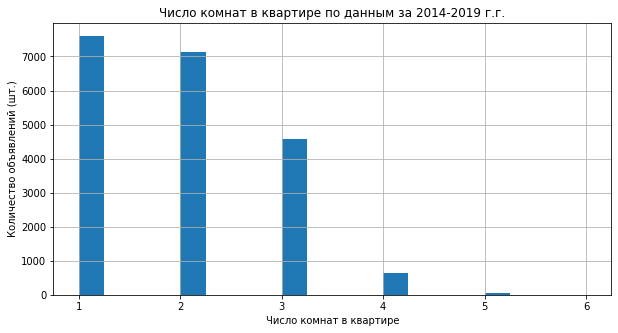

In [44]:
df['number_of_rooms'].plot(
    kind='hist',
    alpha=1.0,
    bins=20,
    title='Число комнат в квартире по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(10,5),
    fontsize=10)
plt.xlabel('Число комнат в квартире')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

#### Высота потолков

Посмотрим описательную статистику для столбца "Высота потолков"

In [45]:
df['ceiling_height'].describe().round(2)

count    20025.00
mean         2.70
std          0.82
min          1.00
25%          2.55
50%          2.70
75%          2.70
max         32.00
Name: ceiling_height, dtype: float64

Построим гистограмму "Высота потолков"

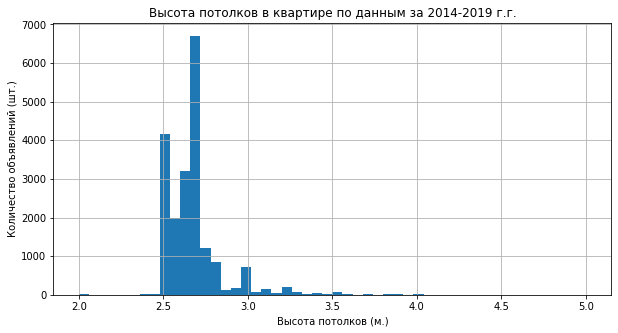

In [46]:
df['ceiling_height'].plot(
    kind='hist',
    alpha=1.0,
    bins=50,
    range=(2,5),
    title='Высота потолков в квартире по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(10,5),
    fontsize=10)
plt.xlabel('Высота потолков (м.)')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

Построим диаграмму размаха для столбца "Высота потолков"

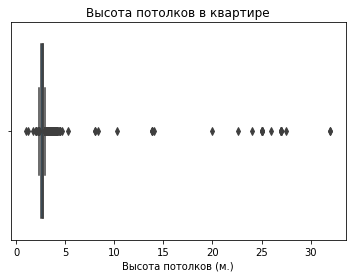

In [47]:
sns.boxplot(df.ceiling_height)
plt.title('Высота потолков в квартире')
plt.xlabel('Высота потолков (м.)')
plt.show()

Высота потолка 32 метра - вероятно это очень красиво, но для нашего исследования не подходит. Почистим данные от редких значений.

In [48]:
# удаление из исследования редких и выбивающихся значений в столбце "Высота потолков"
df = normal_distribution(df,'ceiling_height')
df['ceiling_height'].describe().round(2)

count    18412.00
mean         2.63
std          0.10
min          2.34
25%          2.55
50%          2.65
75%          2.70
max          2.92
Name: ceiling_height, dtype: float64

Построим гистограмму "Высота потолков" после удаления редких и выбивающихся значений

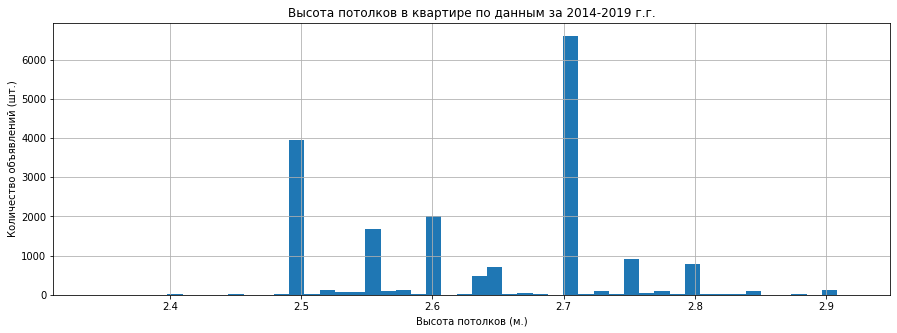

In [49]:
df['ceiling_height'].plot(
    kind='hist',
    alpha=1.0,
    bins=50,
    title='Высота потолков в квартире по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(15,5),
    fontsize=10)
plt.xlabel('Высота потолков (м.)')
plt.ylabel('Количество объявлений (шт.)')
plt.show()



### Исследование количества времени для продажи квартиры

Посмотрим описательную статистику для столбца "Сколько дней было размещено объявление"

In [50]:
df['days_exposition'].describe().round()

count    18412.0
mean       162.0
std        197.0
min          1.0
25%         45.0
50%         95.0
75%        192.0
max       1580.0
Name: days_exposition, dtype: float64

Построим гистограмму "Время продажи квартиры"

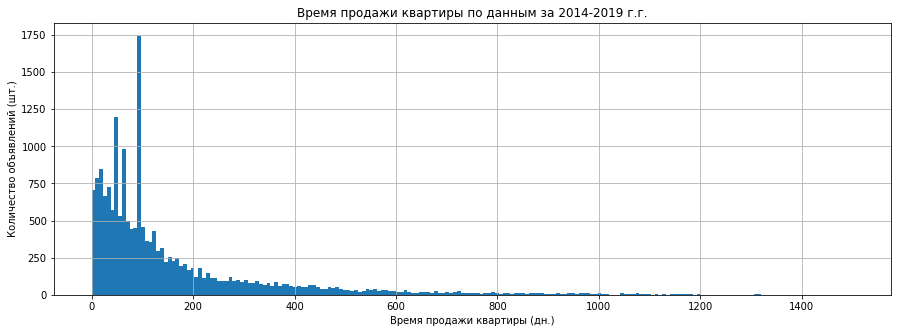

In [51]:
df['days_exposition'].plot(
    kind='hist',
    alpha=1.0,
    bins=200,
    range=(0,1500),
    title='Время продажи квартиры по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(15,5),
    fontsize=10)
plt.xlabel('Время продажи квартиры (дн.)')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

На гистограмме видим пиковые значения, посмотрим на них внимательно

In [52]:
# выявление пиковых дней продажи
df['days_exposition'].value_counts().head()

95    1289
45     716
60     444
7      191
30     175
Name: days_exposition, dtype: int64

Посчитаем среднее время продажи и медиану

In [53]:
df.agg({'days_exposition': ['mean', 'median']})

,days_exposition
mean,162.230882
median,95.000000


45, 60 и 95 дней от момента публикации объявления до продажи квартиры - возможно такие выбросы связаны с автоматическим снятием объявления с публикаци по истечению определенного срока в 2 и 3 месяца, например. А вот некоторые объявления "висят" годами. Если квартиру удалось продать меньше, чем за пару месяцев, можно считать это быстрой продажей. Необычно долгие продажи - от года и более.

### Исследование факторов, влияющих на стоимость квартиры

Рассмотрим как на стоимость квартиры влияют различные факторы. Разделим их на категориальные (этаж, на котором расположена квартира) и количественные:
- общая площадь,
- количество комнат,
- удаленность от центра,
- день недели, когда было опубликовано объявление,
- месяц публикации,
- год публикации.  

Посчитаем коэффициент корреляции Пирсона для количественных факторов. Возьмём для расчётов цену за квадратный метр, чтобы исключить влияние площади квартиры.

In [54]:
corr_matrix = df[['price_sq_meter','total_area', 'number_of_rooms', 'city_centers_nearest', 
                  'day_exposition', 'month_exposition', 'year_exposition']].corr().round(2)
display(corr_matrix)

,price_sq_meter,total_area,number_of_rooms,city_centers_nearest,day_exposition,month_exposition,year_exposition
price_sq_meter,1.00,-0.13,-0.27,-0.40,-0.00,-0.01,0.09
total_area,-0.13,1.00,0.80,-0.07,-0.00,0.01,-0.06
number_of_rooms,-0.27,0.80,1.00,-0.03,-0.00,0.00,-0.03
city_centers_nearest,-0.40,-0.07,-0.03,1.00,0.00,-0.02,0.01
day_exposition,-0.00,-0.00,-0.00,0.00,1.00,0.01,-0.00
month_exposition,-0.01,0.01,0.00,-0.02,0.01,1.00,-0.26
year_exposition,0.09,-0.06,-0.03,0.01,-0.00,-0.26,1.00


Построим матрицу корреляции, чтобы наглядно увидеть влияние количественных факторов на цену квадратного метра квартиры.

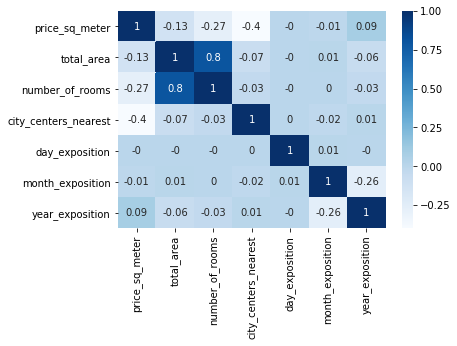

In [55]:
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='Blues')
plt.show()

Цена за квадратный метр имеет среднюю отрицательную корреляцию с количеством комнат.  
Год публикации объявления имеет слабую положительную связь с ценой.  
Точно можно утверждать, что цена не зависит от дня недели и месяца, в котором было опубликовано объявление. Либо эта связь имеет более сложный нелинейный характер.

Построим сводную таблицу "Зависимость цены за квадратный метр от количества комнат в квартире"

In [56]:
df.pivot_table(index='number_of_rooms', values='price_sq_meter').sort_values('price_sq_meter', ascending=False)

,price_sq_meter
number_of_rooms,
1,99599.844539
2,89135.601604
3,81544.834568
4,77864.748191
6,77117.306780
5,67173.204305


В однокомнатной квартире самая высокая цена за квадратный метр. Чем больше квартира - тем дешевле цена за квадратный метр.  

Посмотрим зависит ли цена от того на каком этаже расположена квартира - первом, последнем или другом. Для этого построим сводную таблицу "Зависимость цены за квадратный метр от этажа".

In [57]:
df.pivot_table(index='apartment_floor', values='price_sq_meter').sort_values('price_sq_meter', ascending=False)

,price_sq_meter
apartment_floor,
другой,95065.069517
последний,81858.691457
первый,78344.420247


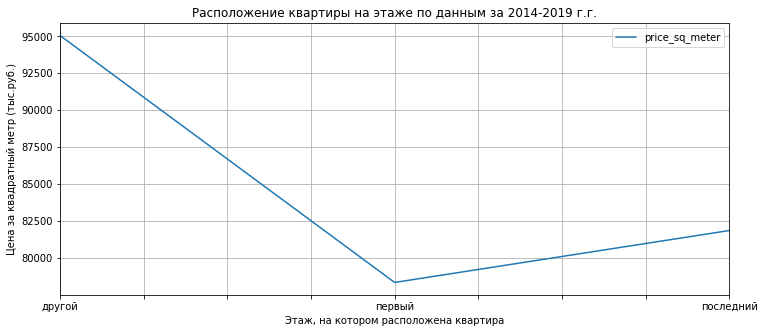

In [58]:
(
    df
    .pivot_table(index='apartment_floor', values='price_sq_meter')
    .plot(grid=True, figsize=(12, 5), title='Расположение квартиры на этаже по данным за 2014-2019 г.г.')
) 
plt.xlabel('Этаж, на котором расположена квартира')
plt.ylabel('Цена за квадратный метр (тыс.руб.)')
plt.show()

Самая низкая цена за квадратный метр у квартир, расположенных на первых этажах. 

### Анализ десяти населённых пунктов с наибольшим числом объявлений

Выберем 10 населённых пунктов с наибольшим числом объявлений и сохраним их в переменную `top_locality`

In [59]:
top_locality = df['locality_name'].value_counts().head(10).index
display(top_locality)

Index(['Санкт-Петербург', 'Мурино', 'Шушары', 'Кудрово', 'Всеволожск',
       'Парголово', 'Колпино', 'Пушкин', 'Гатчина', 'Выборг'],
      dtype='object')

In [60]:
# создание среза данных по 10 населённым пунктам с наибольшим числом объявлений и сохранение в переменную df_top_locality
df_top_locality = df.query('locality_name in @top_locality')
df_top_locality

,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition,price_sq_meter,day_exposition,month_exposition,year_exposition,apartment_floor,living_to_total_area,kitchen_to_total_area
1,3350000.0,40.40,2018-12-04,1,2.63,11,18.60,1,11.00,Шушары,18603.0,81,82920.792079,1,12,2018,первый,0.460396,0.272277
2,5196000.0,56.00,2015-08-20,2,2.70,5,34.30,4,8.30,Санкт-Петербург,13933.0,558,92785.714286,3,8,2015,другой,0.612500,0.148214
6,3700000.0,37.30,2017-11-02,1,2.64,26,10.60,6,14.40,Парголово,19143.0,155,99195.710456,3,11,2017,другой,0.284182,0.386059
7,7915000.0,71.60,2019-04-18,2,2.70,24,43.20,22,18.90,Санкт-Петербург,11634.0,95,110544.692737,3,4,2019,другой,0.603352,0.263966
8,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,8.81,Мурино,NaN,189,87454.764777,2,5,2018,другой,0.465320,0.265682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,3300000.0,31.00,2017-04-29,1,2.55,9,18.00,6,6.50,Санкт-Петербург,11602.0,193,106451.612903,5,4,2017,другой,0.580645,0.209677
23687,3200000.0,39.00,2017-12-16,1,2.70,9,20.00,6,11.00,Санкт-Петербург,16704.0,38,82051.282051,5,12,2017,другой,0.512821,0.282051
23689,3550000.0,35.30,2018-02-28,1,2.86,15,16.30,4,9.10,Санкт-Петербург,16081.0,29,100566.572238,2,2,2018,другой,0.461756,0.257790
23690,5500000.0,52.00,2018-07-19,2,2.70,5,31.00,2,6.00,Санкт-Петербург,6263.0,15,105769.230769,3,7,2018,другой,0.596154,0.115385


Создадим сводную таблицу "Средняя цена за квадратный метр" в 10 населённых пунктах с наибольшим числом объявлений

In [61]:
df_top_locality.pivot_table(index='locality_name', values='price_sq_meter', 
                            aggfunc='mean').sort_values('price_sq_meter', ascending = False).round(2)

,price_sq_meter
locality_name,
Санкт-Петербург,103959.43
Пушкин,99758.01
Кудрово,94680.77
Парголово,90474.31
Мурино,85118.90
Шушары,78292.19
Колпино,75151.46
Гатчина,68349.30
Всеволожск,66899.92


Самая высокая цена в г.Санкт-Петербург составляет 104 410,30 руб. за квадратный метр в г.Санкт-Петербург, самая низкая цена в г.Красное Село составляет 72 100,68 руб. за квадратный метр.

### Анализ изменения цены по степени удалённости от центра

Выделим квартиры в Санкт-Петербурге и сохраним срез данных в переменную df_spb

In [62]:
df_spb = df.query('locality_name == "Санкт-Петербург"')
df_spb.head()

,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition,price_sq_meter,day_exposition,month_exposition,year_exposition,apartment_floor,living_to_total_area,kitchen_to_total_area
2,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,8.3,Санкт-Петербург,13933.0,558,92785.714286,3,8,2015,другой,0.612500,0.148214
7,7915000.0,71.6,2019-04-18,2,2.70,24,43.2,22,18.9,Санкт-Петербург,11634.0,95,110544.692737,3,4,2019,другой,0.603352,0.263966
9,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,6.5,Санкт-Петербург,15008.0,289,88524.590164,6,2,2017,другой,0.714754,0.106557
10,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,8.5,Санкт-Петербург,13878.0,137,127525.252525,3,11,2017,другой,0.512626,0.214646
15,4650000.0,39.0,2017-11-18,1,2.70,14,20.5,5,7.6,Санкт-Петербург,14259.0,19,119230.769231,5,11,2017,другой,0.525641,0.194872


Создадим и добавим в таблицу столбец "Расстояние до центра в километрах"

In [63]:
df_spb['centers_nearest'] = (df_spb['city_centers_nearest']/1000).round(0)
df_spb.head()
pd.set_option('mode.chained_assignment', None)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Построим график средней цены для каждого километра

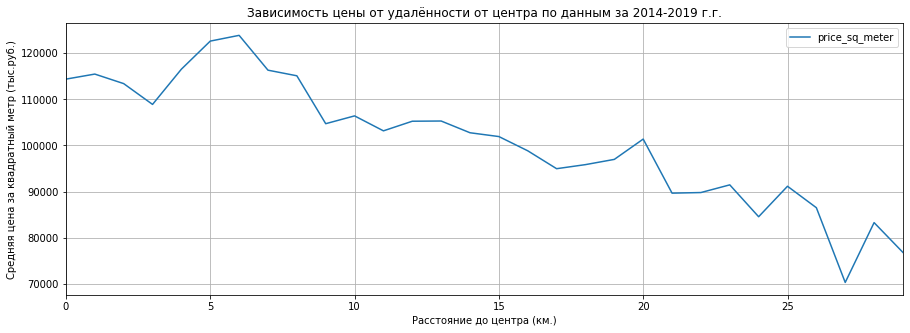

In [64]:
df_spb.pivot_table(
    index='centers_nearest', 
    values='price_sq_meter', 
    aggfunc='mean').plot(
    grid=True, 
    figsize=(15, 5), 
    title='Зависимость цены от удалённости от центра по данным за 2014-2019 г.г.')
plt.xlabel('Расстояние до центра (км.)')
plt.ylabel('Средняя цена за квадратный метр (тыс.руб.)')
plt.show()

График "Зависимость цены от удалённости" от центра показывает, что средняя цена за квадратный метр снижается почти равномерно с удалением от центра.  
Выделим центральную зону 6 км. для дальнейшего исследования. 

### Сравнение выводов по квартирам в центре и общих выводов по всему городу

Выделим сегмент квартир, расположенных в центре г.Санкт-Петербург и сохраним в переменную `df_spb_center`

In [65]:
df_spb_center = df_spb.query('centers_nearest <= 6')
df_spb_center.head()

,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition,price_sq_meter,day_exposition,month_exposition,year_exposition,apartment_floor,living_to_total_area,kitchen_to_total_area,centers_nearest
24,6500000.0,97.2,2015-10-31,2,2.7,3,46.5,1,19.6,Санкт-Петербург,2336.0,265,66872.427984,5,10,2015,первый,0.478395,0.201646,2.0
61,7990000.0,74.0,2017-08-24,2,2.7,4,43.0,4,20.0,Санкт-Петербург,4288.0,609,107972.972973,3,8,2017,последний,0.581081,0.270270,4.0
99,9600000.0,90.0,2017-09-26,4,2.7,5,67.0,2,8.0,Санкт-Петербург,2818.0,104,106666.666667,1,9,2017,другой,0.744444,0.088889,3.0
111,4590000.0,40.0,2017-05-29,1,2.7,6,18.0,1,10.0,Санкт-Петербург,6175.0,31,114750.000000,0,5,2017,первый,0.450000,0.250000,6.0
114,4000000.0,21.4,2019-02-07,1,2.9,8,8.3,7,6.3,Санкт-Петербург,5791.0,95,186915.887850,3,2,2019,другой,0.387850,0.294393,6.0


Посмотрим описательную статистику для квартир в центре Санкт-Петербурга

In [66]:
df_spb_center[['total_area', 'last_price', 'number_of_rooms', 'ceiling_height']].describe()

,total_area,last_price,number_of_rooms,ceiling_height
count,1079.000000,1.079000e+03,1079.000000,1079.000000
mean,61.035514,6.968407e+06,2.136237,2.709222
std,19.618414,1.893971e+06,0.921287,0.081741
min,17.000000,1.900000e+06,1.000000,2.400000
25%,45.000000,5.500000e+06,1.000000,2.700000
50%,59.400000,6.880000e+06,2.000000,2.700000
75%,74.000000,8.492500e+06,3.000000,2.700000
max,114.200000,1.082400e+07,6.000000,2.920000


Портрет "средней" квартиры в центре Санкт-Петербурга:
- общая площадь 62 кв.м.,
- цена 7,2 млн.руб., 
- 2 комнаты,
- высота потолков 2,7 м.


Сравним как количественные факторы влияют на цену квартиры в центре и в общем по городу.

In [67]:
# вычисление коэффициента корреляции Пирсона по г. Санкт-Петербург
corr_matrix_spb = df_spb[['price_sq_meter', 'number_of_rooms', 'city_centers_nearest', 
                  'day_exposition']].corr()[['price_sq_meter']].round(2).reset_index()

# вычисление коэффициента корреляции Пирсона для центральной части г. Санкт-Петербург
corr_matrix_spb_center = df_spb_center[['price_sq_meter', 'number_of_rooms', 'city_centers_nearest', 
                  'day_exposition']].corr()[['price_sq_meter']].round(2).reset_index()

Объединим данные о корреляции в центре Санкт-Петербурга с данными по всему городу для наглядного сравнения.

In [68]:
spb_vs_center_corr = corr_matrix_spb.merge(corr_matrix_spb_center, on = 'index')

# переименование столбцов после объединения
spb_vs_center_corr = spb_vs_center_corr.rename(columns={'price_sq_meter_x':'город',
                                                        'price_sq_meter_y':'центр'})
display(spb_vs_center_corr)

,index,город,центр
0,price_sq_meter,1.00,1.00
1,number_of_rooms,-0.41,-0.55
2,city_centers_nearest,-0.29,0.14
3,day_exposition,0.00,0.02


По данным таблицы корреляции мы видим, что:
- отрицательная взаимосвязь между количеством комнат и ценой за квадратный метр сильнее в центре Санкт-Петербурга, чем во всем городе,
- утверждение, что "цена не зависит от дня недели, в который было размещено объявление" справедливо и для центральной части и для всего города.

In [69]:
# создание сводной таблицы зависимости цены от этажа по всему городу и сохранение её в переменную spb_pivot
spb_pivot = df_spb.pivot_table(index='apartment_floor', 
                               values='price_sq_meter').sort_values('price_sq_meter', ascending=False)

# создание сводной таблицы зависимости цены от этажа по центру города и сохранение её в переменную spb_center_pivot
spb_center_pivot = df_spb_center.pivot_table(index='apartment_floor', 
                                             values='price_sq_meter').sort_values('price_sq_meter', ascending=False)

In [70]:
# объединение столбцов сводных таблиц по центру и по всему городу
spb_vs_center = spb_pivot.merge(spb_center_pivot, on = 'apartment_floor')

# переименование столбцов после объединения для наглядного сравнения
spb_vs_center = spb_vs_center.rename(columns={'price_sq_meter_x':'город', 'price_sq_meter_y':'центр'})
display(spb_vs_center.round(2))

,город,центр
apartment_floor,,
другой,105935.25,123492.94
последний,100023.78,111919.50
первый,93370.06,107574.80


Данные в таблице показывают:
- цена за квадратный метр в центре выше, чем по городу,
- утверждение "самая низкая цена за квадратный метр в квартирах, расположенных на первом этаже" справедливо и для центральной части и для всего города.

**Вывод**

Исследовательский анализ данных показывает:
- исходные данные содержат множество выбросов, похожих на ошибки и редко встречающиеся значения, поэтому такие данные исключили из анализа,
- "пики" продаж приходятся на 45, 60 и 95 день после публикации объявления, предположительно это техническая ошибка, связанная с тем, что объявления автоматически снимают с публикации по истечении опеределенного времени. Необходимо уточнить этот вопрос у разработчиков,
- цена не зависит от дня публикации объявления,
- наличие средней отрицательной взаимосвязи между ценой за квадратный метр и количеством комнат в кваритре. То есть чем больше квартира - тем меньше цена за квадратный метр,
- квадратный метр квартир, расположенных на первом этаже, дешевле, чем у квартир на других этажах,
- из 10 городов с самым большим количеством продаваемых квартир, самое дорогое жилье в г. Санкт-Петербург, а самое дешевое - в г. Красное село,
- в центральной части г. Санкт-Петербург цена за квадратный метр в центре выше, чем по всему городу.

## Общий вывод

Объект нашего исследования - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Поскольку о качестве данных, которые мы получили от сервиса Яндекс.Недвижимость, ничего не было известно, мы провели обзор данных, чтобы выделить явные неточности.

Мы проверили архив на ошибки и оценили их влияние на исследование. Предобработка данных обнаружила несколько проблем:
1. нарушения в стиле заголовков,
2. пропущенные значения,
3. некорректный тип данных,
4. неявные дубликаты, 
5. аномальные значения, которые не отражают действительность.

Самые критичные ошибки данных мы исправили:
* заполнили пропущенные значения в столбцах "Высота потолков", "Жилая площадь", "Площадь кухни", "Расстояние до центра города", "Сколько дней было размещено объявление" на медиану по каждому населенному пункту, чтобы сделать исследование более точным.
* поменяли тип данных с вещественного на целочисленный для столбцов "Всего этажей в доме", "Сколько дней было размещено объявление"; 
* удалили неявные дубликаты в столбце "Название населённого пункта".

Сделали дополнительные расчёты:
* цена квадртаного метра - чтобы исключить влияние площади квартиры,
* день недели, месяц, год публикации объявления, чтобы узнать как зависит цена от дня размещения объявления,

Провели категоризацию данных по расположению кватиры на этаже, выделили три категории - первый, последний, другой.

Таким образом, исследование проводили в четыре этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Расчеты и добавление результатов в таблицу.
 4. Исследовательский анализ данных.

По результатам исследования архива объявлений о продаже недвижимости в Санкт-Петербурге и соседних населенных пунктах за несколько лет, мы установили, что:
* в однокомнатной квартире самая высокая цена за квадратный метр. Чем меньше квартира - тем дороже цена за квадратный метр;
* стоимость квартиры, расположенной на первом этаже, ниже, чем на последнем и других этажах;
* дата размещения объявления не влияет на стоимость квартиры;
* продажу квартиры, которая проходила меньше двух месяцев, можной назвать быстрой продажей;
* из 10 городов с самым большим количеством продаваемых квартир, самое дорогое жилье в г. Санкт-Петербург, а самое дешевое - в г. Красное село;
* в центральной части Санкт-Петербурга цена за квадратный метр в центре выше, чем по всему городу.

Подведём итоги нашей работы - несколько рекомендаций для сервиса Яндекс.Недвижимость:

* Обратить внимание на "пиковые" сроки снятия объявления с публикации - 45, 60 и 95. Выяснить может ли это быть технической ошибкой или имеет иной характер. 

* Предоставить возможность при заполнении характеристик квартиры выбирать некоторые параметры из выпадающего списка, чтобы исключить опечатки, ошибки.

* Сделать обязательным для заполнения параметр "Название населенного пункта". Такие объявления, из которых непонятно местоположение квартиры, покупатели могут просто игнорировать и продажи затянутся.

# Исследование объявлений о продаже квартир 

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Импортируем библиотеки, с которыми будем работать

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Сохраняем данные в переменную df

df = pd.read_csv('/datasets/real_estate_data.csv')
display(df.head(10))

Данные представлены в виде склеенной строки, поэтому применим в качестве разделителя столбцов знак табуляции и выведем на экран первые 10 строк таблицы. <a id='intro'></a>

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
display(df.head(10))

Посмотрим общую информацию о данных

df.info()

Посмотрим описательную статистику по каждому столбцу датафрейма

df.describe().T

### Вывод

В таблице "Архив объявлений о продаже квартир" 23699 строк и 22 столбца. В двух столбцах тип данных - bool, в 14 столбцах - float64, по три столбца типа int64 и object.
В столбце "Число комнат" обнаружены значения, равные нулю, что противоречит логике, т.к. количество комнат в квартире не может быть меньше единицы. Предположим, что такие ошибки обусловлены человеческим фактором. Всего таких "неправильных" квартир меньше 1%, поэтому данные не могут серьезно повлиять на результаты исследований, следовательно можем оставить их без изменений.
Количество значений в столбцах различается. Значит, в данных есть пропущенные значения. 

## Предобработка данных

### Стиль заголовков

Посмотрим названия столбцов нашей таблицы

df.columns

Столбцы "Количество комнат" и "Расстояние до центра города" переименуем в соответствии со змеиным стилем.

df = df.rename(columns={'rooms': 'number_of_rooms', 'cityCenters_nearest': 'city_centers_nearest'})

# проверка переименованных столбцов
df.columns

Привели названия столбцов в  соответствие с хорошим стилем.

### Пропуски значений

Убедимся, что данные по общей площади квартиры  не превышают сумму жилой площади и площади кухни до того как обработаем пропуски.

df_filtr_before = df.query('total_area < (living_area+kitchen_area)')
df_filtr_before

Всего в исходных данных 64 объявления, в которых общая площадь квартиры больше, чем сумма жилой площади и площади кухни. Вероятно такие ошибочные данные появились из-за неточности в расчетах или возникли при публикации объявления как опечатки в заполнении нужных параметров пользователями.

Посчитаем количество пропущенных значений в каждом из столбцов датафрейма.

df.isna().sum()

Мы обнаружили в объявлениях много пропущенных значений. Заполним пропуски на медиану по каждому населенному пункту в столбцах:  
* "Высота потолков",
* "Растояние до центра города",
* "Сколько дней было размещено объявление".  

В столбцах "Жилая площадь" и "Площадь кухни" заполним пропуски на медиану по каждому населенному пункту и по общей площади квартиры.

df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('locality_name')['ceiling_height'].transform('median'))
df['living_area'] = df['living_area'].fillna(df.groupby(['locality_name','total_area'])['living_area'].transform('median'))
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby(['locality_name','total_area'])['kitchen_area'].transform('median')) 
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(df.groupby('locality_name')['city_centers_nearest'].transform('median'))
df['days_exposition'] = df['days_exposition'].fillna(df.groupby('locality_name')['days_exposition'].transform('median'))

# проверка замены пропущенных значений
df.isna().sum()

Убедимся, что данные по общей площади квартиры  не превышают сумму жилой площади и площади кухни после замены пропущенных значений.

df_filtr_after = df.query('total_area < (living_area+kitchen_area)')
df_filtr_after

После замены пропущенных значений увеличилось до 104 количество объявлений, в которых общая площадь квартиры превышает сумму жилой площади и кухни. Поскольку в исходных данных такие ошибки встречались и у нас нет инструментов, чтобы достоверно исправить данные, оставим такие неточности без изменений (тем более существенно на ход исследования они не повляют). 

Пропущенные значения в столбцах:
* "Площадь кухни", 
* "Жилая площадь", 
* "Всего этажей в доме",
* "Количество дней размещения объявления",
* "Высота потолков" рассчитать не можем, поэтому удалим строки с пропущенными значениями в этих столбцах. 

Пропуски в столбце "Название населенного пункта" тоже удаляем, такие объявления неинформативны для покупателей квартиры и для нашего исследования тоже.

df = df.dropna(subset=['kitchen_area',
                       'living_area', 
                       'floors_total', 
                       'days_exposition', 
                       'ceiling_height', 
                       'locality_name'])

# проверка удаления пропущенных значений
df.isna().sum()

Удалим столбцы, не участвующие в исследовании:
* "Расстояние до аэропорта",
* "Количество балконов", 
* "Апартаменты",
* "Свободная планировка", 
* "Число парков в радиусе 3 км", 
* "Расстояние до ближайшего парка", 
* "Число водоёмов в радиусе 3 км",
* "Расстояние до ближайшего водоёма", 
* "Квартира-студия", 
* "Число фотографий квартиры в объявлении".

Тем более, что они содержат значительно много пропущенных значений. У нас нет никаких оснований полагать, что мы их достоверно можем восстановить на основе имеющихся данных

df = df.drop(['airports_nearest', 'balcony','is_apartment', 'open_plan', 'parks_around3000',
              'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'studio', 'total_images'], 1)
df.head()

### Тип данных

Заменим вещественный тип данных в столбцах "Сколько дней было размещено объявление", "Всего этажей в доме" на целочисленный тип данных

df['days_exposition'] = df['days_exposition'].astype('int16')
df['floors_total'] = df['floors_total'].astype('int16')
df['number_of_rooms'] = df['number_of_rooms'].astype('int16')
df['floor'] = df['floor'].astype('int16')
df['locality_name'] = df['locality_name'].astype('category')
# проверка замены
df.info()

Количество дней размещения объявления и количество этажей не может быть дробным, поэтому мы заменили тип данных с вещественного на целочисленнй.

### Дубликаты

# проверка на дубликаты
df.duplicated().sum()

Явных дубликатов нет, проверим неявные дубликаты в столбце "Название населенного пункта"

# поиск уникальных значений в столбце "Название населенного пункта"
df['locality_name'].sort_values().unique()

df['locality_name'].value_counts()

Название одного и того же населенного пункта может быть записано по-разному из-за букв "е" и "ё" в словах "поселок" и "посёлок".  
Заменим "ё" на "е".

df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

df['locality_name'].value_counts()

Было 258 названий, стало 236. Неявных дубликатов стало меньше.

Уберём теперь типы населённых пунктов, оставим одни названия. Потому что "городской поселок Мга" и "поселок городского типа Мга" - это один населённый пункт, только из-за некорректного написания дублируется. Для этого создадим функцию, которая удалит слова, написанные строчными буквами в столбце "Название населённого пункта".

# импортируем специальный модуль re
import re 

# функция only_upper вернет копию строки, с заменой слов, написанных строчными буквами и удалит пробелы в начале и конце строки
def only_upper(row):
    return re.sub(r'\b[а-я]+\s*', "", row['locality_name']).strip()
df['locality_name'] = df.apply(only_upper, axis=1)

# проверяем работу функции
df['locality_name'].value_counts()

Было 236 названий, стало 223, мы избавились от неявных дубликатов.

### Вывод

В ходе предобработки данных мы обнаружили несколько проблем:

- нарушения в стиле заголовков,
- пропущенные значения,
- некорректный тип данных,
- неявные дубликаты.

Мы исправили заголовки, чтобы упростить работу с таблицей, заменили тип данных. Без дубликатов исследование станет более точным.

Пропущенные значения мы заменили на медиану в тех столбцах, где это было возможно рассчитать. Предположительно большое количество пропусков связано с техническими ошибками - все геоданных были получены автоматически на основе картографических данных. Часть пропущенных значений о планировке и расположении квартир вероятно вызвана человеческим фактором при размещении объявлений - пользователи или невнимательно заполняют данные или умышленно не указывают некоторые характеристики квартир.

Приступим к исследованию.

## Расчёты и добавление результатов в таблицу

Рассчитаем цену квадратного метра и добавим в таблицу новый столбец "Цена квадратного метра".

df['price_sq_meter'] = df['last_price']/df['total_area']

df.head()

Переведём значения в столбце "Дата публикации" к формату даты и времени. Добавим столбцы:
* "День недели публикации объявления", 
* "Месяц публикации объявления", 
* "Год публикации объявления"

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

df['day_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

#проверка
df.head()

df.info()

Добавим категории этажа, на котором расположена квартира, в отдельный столбец "Этаж квартиры". Напишем функцию, которая вернет три категории:
* первый, 
* последний, 
* другой.

def apartment_floor(data):
    if data['floor'] == data['floors_total']:
        return 'последний'
    if data['floor'] == 1:
        return 'первый'
    return 'другой'
 
df['apartment_floor'] = df.apply(apartment_floor, axis=1)

# проверка
df.head()

Добавим столбцы "Соотношение жилой и общей площади" и "Отношение площади кухни к общей площади"

df['living_to_total_area'] = df['living_area']/df['total_area']
df['kitchen_to_total_area'] = df['kitchen_area']/df['total_area']

# проверка
df.head()

Мы добавили к таблице необходимые для дальнейшего исследования расчёты. Теперь рассмотрим подробнее столбцы "Общая площадь", "Цена на момент снятия публикации", "Число комнат", "Высота потолков"

## Исследовательский анализ данных

### Исследование площади, цены, числа комнат, высоты потолков

Проанализируем описательную статистику для исследуемых столбцов

df[['total_area', 'last_price', 'number_of_rooms', 'ceiling_height']].describe()

Видим необычные значения:
* общая площадь 900 квадратных метров,
* количество комнат 0 - совсем нелогично, не может быть меньше 1,
* помещения с высотой потолка 1 метр и 100 метров.  

Проанализируем каждый параметр в отдельности.

#### Общая площадь

Посмотрим описательную статистику для столбца "Общая площадь"

df['total_area'].describe().round(2)

Построим гистограмму "Общая площадь квартиры"

df['total_area'].plot(
    kind='hist',
    alpha=1.0,
    bins=500,
    title='Общая площадь квартиры по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(12,5),
    fontsize=10)
plt.xlabel('Площадь квартиры (кв.м.)')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

Построим диаграмму размаха или "ящик с усами" для столбца "Общая площадь"

sns.boxplot(df.total_area)
plt.title('Общая площадь квартиры')
plt.xlim(0, 500)
plt.xlabel('Площадь квартиры (кв.м.)')
plt.show()

На графиках видно, что в объявлениях редко встречаются квартиры с площадью больше 120 кв.м., исключим их из исследования. Чтобы точнее удалить редкие и выбивающиеся значения, создадим функцию, которая посчитает межквартильный размах и определит пределы, по которым можно отсекать лишние значения.

# создание функции для нормального распределения
def normal_distribution(data,column):
    """Возвращает срез данных по столбцу, соответствующего диапазона:
- считает первый квантиль
- считает третий квантиль
- считает межквартильный размах - разницу между третьим и первым квантилем
- считает диапазон отсекаемых значений слева - из первого квантиля вычитает 1,5 межквартильных размаха
- считает диапазон отсекаемых значений справа как сумму третьего квантиля и 1,5 межквартильных размаха
    """
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3-q1
    return df.query(f"{(q1-1.5*iqr)}<= {column} <= {(q3+1.5*iqr)}")

# применяем функцию к столбцу "Общая площадь", чтобы удалить из исследования редкие значения 
df = normal_distribution(df,'total_area')
df['total_area'].describe().round(2)

Построим гистограмму "Общая площадь" квартиры после удаления редких значений

df['total_area'].plot(
    kind='hist',
    alpha=1.0,
    bins=30,
    title='Общая площадь квартиры по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(12,5),
    fontsize=10)
plt.xlabel('Площадь квартиры (кв.м.)')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

#### Цена

Посмотрим описательную статистику для столбца "Цена квартиры на момент снятия объявления с публикации"

df['last_price'].describe().round(2)

Построим гистограмму "Цена квартиры на момент снятия объявления с публикации"

df['last_price'].plot(
    kind='hist',
    alpha=1.0,
    bins=100,
    range=(0, 30e+6),              
    title='Цена квартиры на момент снятия объявления с публикации по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(15,5),
    fontsize=10)
plt.xlabel('Цена квартиры на момент снятия объявления с публикации (млн.руб.)')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

Построим диаграмму размаха для столбца "Цена на момент снятия с публикации"

sns.boxplot(df.last_price)
plt.title('Цена квартиры на момент снятия объявления с публикации')
plt.xlabel('Цена квартиры (млн.руб.)')
plt.xlim(0, 3e+7)
plt.show()

На графиках видны выбросы, например, квартиры, стоимостью 50 и 80 млн.руб. Исключим их из исследования вместе с "подозрительно" дешевыми квартирами, например, 12 тыс.руб.

# удаление из исследования редких и выбивающихся значения в столбце "Цена на момент снятия с публикации"
df = normal_distribution(df,'last_price')
df['last_price'].describe().round(2)

Построим гистограмму "Цена квартиры на момент снятия с публикации" после удаления редких и выбивающихся значений.

df['last_price'].plot(
    kind='hist',
    alpha=1.0,
    bins=50,
    range=(0, 12e+6),              
    title='Цена квартиры на момент снятия объявления с публикации по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(15,5),
    fontsize=10)
plt.xlabel('Цена квартиры на момент снятия объявления с публикации (млн.руб.)')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

#### Число комнат

Посмотрим описательную статистику для столбца "Число комнат в квартире"

df['number_of_rooms'].describe().round(2)

Построим гистограмму "Число комнат в квартире"

df['number_of_rooms'].plot(
    kind='hist',
    alpha=1.0,
    bins=20,
    title='Число комнат в квартире по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(15,5),
    fontsize=10)
plt.xlabel('Число комнат в квартире')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

Построим диаграмму размаха для столбца "Число комнат"

sns.boxplot(df.number_of_rooms)
plt.title('Число комнат в квартире')
plt.xlabel('Количество комнат')
plt.show()

Все квартиры с количеством комнат меньше 1 являются вероятнее всего ошибкой в объявлении, удалим их из исследования.

# удаление из исследования редких и выбивающихся значения в столбце "Количество комнат"
df = df.query('number_of_rooms >= 1')

Посмотрим описательную статистику для столбца "Число комнат в квартире" после удаления редких значений

df['number_of_rooms'].describe().round(2)

Построим гистограмму "Число комнат в квартире"после удаления редких значений

df['number_of_rooms'].plot(
    kind='hist',
    alpha=1.0,
    bins=20,
    title='Число комнат в квартире по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(10,5),
    fontsize=10)
plt.xlabel('Число комнат в квартире')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

#### Высота потолков

Посмотрим описательную статистику для столбца "Высота потолков"

df['ceiling_height'].describe().round(2)

Построим гистограмму "Высота потолков"

df['ceiling_height'].plot(
    kind='hist',
    alpha=1.0,
    bins=50,
    range=(2,5),
    title='Высота потолков в квартире по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(10,5),
    fontsize=10)
plt.xlabel('Высота потолков (м.)')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

Построим диаграмму размаха для столбца "Высота потолков"

sns.boxplot(df.ceiling_height)
plt.title('Высота потолков в квартире')
plt.xlabel('Высота потолков (м.)')
plt.show()

Высота потолка 32 метра - вероятно это очень красиво, но для нашего исследования не подходит. Почистим данные от редких значений.

# удаление из исследования редких и выбивающихся значений в столбце "Высота потолков"
df = normal_distribution(df,'ceiling_height')
df['ceiling_height'].describe().round(2)

Построим гистограмму "Высота потолков" после удаления редких и выбивающихся значений

df['ceiling_height'].plot(
    kind='hist',
    alpha=1.0,
    bins=50,
    title='Высота потолков в квартире по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(15,5),
    fontsize=10)
plt.xlabel('Высота потолков (м.)')
plt.ylabel('Количество объявлений (шт.)')
plt.show()



### Исследование количества времени для продажи квартиры

Посмотрим описательную статистику для столбца "Сколько дней было размещено объявление"

df['days_exposition'].describe().round()

Построим гистограмму "Время продажи квартиры"

df['days_exposition'].plot(
    kind='hist',
    alpha=1.0,
    bins=200,
    range=(0,1500),
    title='Время продажи квартиры по данным за 2014-2019 г.г.',
    grid=True,
    figsize=(15,5),
    fontsize=10)
plt.xlabel('Время продажи квартиры (дн.)')
plt.ylabel('Количество объявлений (шт.)')
plt.show()

На гистограмме видим пиковые значения, посмотрим на них внимательно

# выявление пиковых дней продажи
df['days_exposition'].value_counts().head()

Посчитаем среднее время продажи и медиану

df.agg({'days_exposition': ['mean', 'median']})

45, 60 и 95 дней от момента публикации объявления до продажи квартиры - возможно такие выбросы связаны с автоматическим снятием объявления с публикаци по истечению определенного срока в 2 и 3 месяца, например. А вот некоторые объявления "висят" годами. Если квартиру удалось продать меньше, чем за пару месяцев, можно считать это быстрой продажей. Необычно долгие продажи - от года и более.

### Исследование факторов, влияющих на стоимость квартиры

Рассмотрим как на стоимость квартиры влияют различные факторы. Разделим их на категориальные (этаж, на котором расположена квартира) и количественные:
- общая площадь,
- количество комнат,
- удаленность от центра,
- день недели, когда было опубликовано объявление,
- месяц публикации,
- год публикации.  

Посчитаем коэффициент корреляции Пирсона для количественных факторов. Возьмём для расчётов цену за квадратный метр, чтобы исключить влияние площади квартиры.

corr_matrix = df[['price_sq_meter','total_area', 'number_of_rooms', 'city_centers_nearest', 
                  'day_exposition', 'month_exposition', 'year_exposition']].corr().round(2)
display(corr_matrix)

Построим матрицу корреляции, чтобы наглядно увидеть влияние количественных факторов на цену квадратного метра квартиры.

sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='Blues')
plt.show()

Цена за квадратный метр имеет среднюю отрицательную корреляцию с количеством комнат.  
Год публикации объявления имеет слабую положительную связь с ценой.  
Точно можно утверждать, что цена не зависит от дня недели и месяца, в котором было опубликовано объявление. Либо эта связь имеет более сложный нелинейный характер.

Построим сводную таблицу "Зависимость цены за квадратный метр от количества комнат в квартире"

df.pivot_table(index='number_of_rooms', values='price_sq_meter').sort_values('price_sq_meter', ascending=False)

В однокомнатной квартире самая высокая цена за квадратный метр. Чем больше квартира - тем дешевле цена за квадратный метр.  

Посмотрим зависит ли цена от того на каком этаже расположена квартира - первом, последнем или другом. Для этого построим сводную таблицу "Зависимость цены за квадратный метр от этажа".

df.pivot_table(index='apartment_floor', values='price_sq_meter').sort_values('price_sq_meter', ascending=False)

(
    df
    .pivot_table(index='apartment_floor', values='price_sq_meter')
    .plot(grid=True, figsize=(12, 5), title='Расположение квартиры на этаже по данным за 2014-2019 г.г.')
) 
plt.xlabel('Этаж, на котором расположена квартира')
plt.ylabel('Цена за квадратный метр (тыс.руб.)')
plt.show()

Самая низкая цена за квадратный метр у квартир, расположенных на первых этажах. 

### Анализ десяти населённых пунктов с наибольшим числом объявлений

Выберем 10 населённых пунктов с наибольшим числом объявлений и сохраним их в переменную `top_locality`

top_locality = df['locality_name'].value_counts().head(10).index
display(top_locality)

# создание среза данных по 10 населённым пунктам с наибольшим числом объявлений и сохранение в переменную df_top_locality
df_top_locality = df.query('locality_name in @top_locality')
df_top_locality

Создадим сводную таблицу "Средняя цена за квадратный метр" в 10 населённых пунктах с наибольшим числом объявлений

df_top_locality.pivot_table(index='locality_name', values='price_sq_meter', 
                            aggfunc='mean').sort_values('price_sq_meter', ascending = False).round(2)

Самая высокая цена в г.Санкт-Петербург составляет 104 410,30 руб. за квадратный метр в г.Санкт-Петербург, самая низкая цена в г.Красное Село составляет 72 100,68 руб. за квадратный метр.

### Анализ изменения цены по степени удалённости от центра

Выделим квартиры в Санкт-Петербурге и сохраним срез данных в переменную df_spb

df_spb = df.query('locality_name == "Санкт-Петербург"')
df_spb.head()

Создадим и добавим в таблицу столбец "Расстояние до центра в километрах"

df_spb['centers_nearest'] = (df_spb['city_centers_nearest']/1000).round(0)
df_spb.head()
pd.set_option('mode.chained_assignment', None)

Построим график средней цены для каждого километра

df_spb.pivot_table(
    index='centers_nearest', 
    values='price_sq_meter', 
    aggfunc='mean').plot(
    grid=True, 
    figsize=(15, 5), 
    title='Зависимость цены от удалённости от центра по данным за 2014-2019 г.г.')
plt.xlabel('Расстояние до центра (км.)')
plt.ylabel('Средняя цена за квадратный метр (тыс.руб.)')
plt.show()

График "Зависимость цены от удалённости" от центра показывает, что средняя цена за квадратный метр снижается почти равномерно с удалением от центра.  
Выделим центральную зону 6 км. для дальнейшего исследования. 

### Сравнение выводов по квартирам в центре и общих выводов по всему городу

Выделим сегмент квартир, расположенных в центре г.Санкт-Петербург и сохраним в переменную `df_spb_center`

df_spb_center = df_spb.query('centers_nearest <= 6')
df_spb_center.head()

Посмотрим описательную статистику для квартир в центре Санкт-Петербурга

df_spb_center[['total_area', 'last_price', 'number_of_rooms', 'ceiling_height']].describe()

Портрет "средней" квартиры в центре Санкт-Петербурга:
- общая площадь 62 кв.м.,
- цена 7,2 млн.руб., 
- 2 комнаты,
- высота потолков 2,7 м.


Сравним как количественные факторы влияют на цену квартиры в центре и в общем по городу.

# вычисление коэффициента корреляции Пирсона по г. Санкт-Петербург
corr_matrix_spb = df_spb[['price_sq_meter', 'number_of_rooms', 'city_centers_nearest', 
                  'day_exposition']].corr()[['price_sq_meter']].round(2).reset_index()

# вычисление коэффициента корреляции Пирсона для центральной части г. Санкт-Петербург
corr_matrix_spb_center = df_spb_center[['price_sq_meter', 'number_of_rooms', 'city_centers_nearest', 
                  'day_exposition']].corr()[['price_sq_meter']].round(2).reset_index()

Объединим данные о корреляции в центре Санкт-Петербурга с данными по всему городу для наглядного сравнения.

spb_vs_center_corr = corr_matrix_spb.merge(corr_matrix_spb_center, on = 'index')

# переименование столбцов после объединения
spb_vs_center_corr = spb_vs_center_corr.rename(columns={'price_sq_meter_x':'город',
                                                        'price_sq_meter_y':'центр'})
display(spb_vs_center_corr)

По данным таблицы корреляции мы видим, что:
- отрицательная взаимосвязь между количеством комнат и ценой за квадратный метр сильнее в центре Санкт-Петербурга, чем во всем городе,
- утверждение, что "цена не зависит от дня недели, в который было размещено объявление" справедливо и для центральной части и для всего города.

# создание сводной таблицы зависимости цены от этажа по всему городу и сохранение её в переменную spb_pivot
spb_pivot = df_spb.pivot_table(index='apartment_floor', 
                               values='price_sq_meter').sort_values('price_sq_meter', ascending=False)

# создание сводной таблицы зависимости цены от этажа по центру города и сохранение её в переменную spb_center_pivot
spb_center_pivot = df_spb_center.pivot_table(index='apartment_floor', 
                                             values='price_sq_meter').sort_values('price_sq_meter', ascending=False)

# объединение столбцов сводных таблиц по центру и по всему городу
spb_vs_center = spb_pivot.merge(spb_center_pivot, on = 'apartment_floor')

# переименование столбцов после объединения для наглядного сравнения
spb_vs_center = spb_vs_center.rename(columns={'price_sq_meter_x':'город', 'price_sq_meter_y':'центр'})
display(spb_vs_center.round(2))

Данные в таблице показывают:
- цена за квадратный метр в центре выше, чем по городу,
- утверждение "самая низкая цена за квадратный метр в квартирах, расположенных на первом этаже" справедливо и для центральной части и для всего города.

**Вывод**

Исследовательский анализ данных показывает:
- исходные данные содержат множество выбросов, похожих на ошибки и редко встречающиеся значения, поэтому такие данные исключили из анализа,
- "пики" продаж приходятся на 45, 60 и 95 день после публикации объявления, предположительно это техническая ошибка, связанная с тем, что объявления автоматически снимают с публикации по истечении опеределенного времени. Необходимо уточнить этот вопрос у разработчиков,
- цена не зависит от дня публикации объявления,
- наличие средней отрицательной взаимосвязи между ценой за квадратный метр и количеством комнат в кваритре. То есть чем больше квартира - тем меньше цена за квадратный метр,
- квадратный метр квартир, расположенных на первом этаже, дешевле, чем у квартир на других этажах,
- из 10 городов с самым большим количеством продаваемых квартир, самое дорогое жилье в г. Санкт-Петербург, а самое дешевое - в г. Красное село,
- в центральной части г. Санкт-Петербург цена за квадратный метр в центре выше, чем по всему городу.

## Общий вывод

Объект нашего исследования - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Поскольку о качестве данных, которые мы получили от сервиса Яндекс.Недвижимость, ничего не было известно, мы провели обзор данных, чтобы выделить явные неточности.

Мы проверили архив на ошибки и оценили их влияние на исследование. Предобработка данных обнаружила несколько проблем:
1. нарушения в стиле заголовков,
2. пропущенные значения,
3. некорректный тип данных,
4. неявные дубликаты, 
5. аномальные значения, которые не отражают действительность.

Самые критичные ошибки данных мы исправили:
* заполнили пропущенные значения в столбцах "Высота потолков", "Жилая площадь", "Площадь кухни", "Расстояние до центра города", "Сколько дней было размещено объявление" на медиану по каждому населенному пункту, чтобы сделать исследование более точным.
* поменяли тип данных с вещественного на целочисленный для столбцов "Всего этажей в доме", "Сколько дней было размещено объявление"; 
* удалили неявные дубликаты в столбце "Название населённого пункта".

Сделали дополнительные расчёты:
* цена квадртаного метра - чтобы исключить влияние площади квартиры,
* день недели, месяц, год публикации объявления, чтобы узнать как зависит цена от дня размещения объявления,

Провели категоризацию данных по расположению кватиры на этаже, выделили три категории - первый, последний, другой.

Таким образом, исследование проводили в четыре этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Расчеты и добавление результатов в таблицу.
 4. Исследовательский анализ данных.

По результатам исследования архива объявлений о продаже недвижимости в Санкт-Петербурге и соседних населенных пунктах за несколько лет, мы установили, что:
* в однокомнатной квартире самая высокая цена за квадратный метр. Чем меньше квартира - тем дороже цена за квадратный метр;
* стоимость квартиры, расположенной на первом этаже, ниже, чем на последнем и других этажах;
* дата размещения объявления не влияет на стоимость квартиры;
* продажу квартиры, которая проходила меньше двух месяцев, можной назвать быстрой продажей;
* из 10 городов с самым большим количеством продаваемых квартир, самое дорогое жилье в г. Санкт-Петербург, а самое дешевое - в г. Красное село;
* в центральной части Санкт-Петербурга цена за квадратный метр в центре выше, чем по всему городу.

Подведём итоги нашей работы - несколько рекомендаций для сервиса Яндекс.Недвижимость:

* Обратить внимание на "пиковые" сроки снятия объявления с публикации - 45, 60 и 95. Выяснить может ли это быть технической ошибкой или имеет иной характер. 

* Предоставить возможность при заполнении характеристик квартиры выбирать некоторые параметры из выпадающего списка, чтобы исключить опечатки, ошибки.

* Сделать обязательным для заполнения параметр "Название населенного пункта". Такие объявления, из которых непонятно местоположение квартиры, покупатели могут просто игнорировать и продажи затянутся.